In [1]:
import os
import joblib
import numpy as np
import pandas as pd
import warnings

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
from sklearn.model_selection import LeaveOneOut, train_test_split

pd.set_option('display.max_rows', 69)
pd.set_option('display.max_columns', 40)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Latest%20Covid-19%20India%20Statewise%20Data/Latest%20Covid-19%20India%20Status.csv")
print("csv file loaded")

csv file loaded


In [3]:
print(f'''dataframe shape: Rows: {df.shape[0]}, Columns: {df.shape[1]}
dataframe sumed null values: {df.isnull().sum().sum()}
dataframe columns name: ↴↴
                        ↴↴
                        ↴↴
{df.columns.values}
''')

dataframe shape: Rows: 36, Columns: 8
dataframe sumed null values: 0
dataframe columns name: ↴↴
                        ↴↴
                        ↴↴
['State/UTs' 'Total Cases' 'Active' 'Discharged' 'Deaths'
 'Active Ratio (%)' 'Discharge Ratio (%)' 'Death Ratio (%)']



In [4]:
df.style.background_gradient(cmap="Wistia",text_color_threshold=0.01)

In [5]:
df.describe().T.style.bar(subset=['mean'], color='#606ff2')\
                            .background_gradient(subset=['std'], cmap='PuBu')\
                            .background_gradient(subset=['50%'], cmap='PuBu')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   State/UTs            36 non-null     object 
 1   Total Cases          36 non-null     int64  
 2   Active               36 non-null     int64  
 3   Discharged           36 non-null     int64  
 4   Deaths               36 non-null     int64  
 5   Active Ratio (%)     36 non-null     float64
 6   Discharge Ratio (%)  36 non-null     float64
 7   Death Ratio (%)      36 non-null     float64
dtypes: float64(3), int64(4), object(1)
memory usage: 2.4+ KB


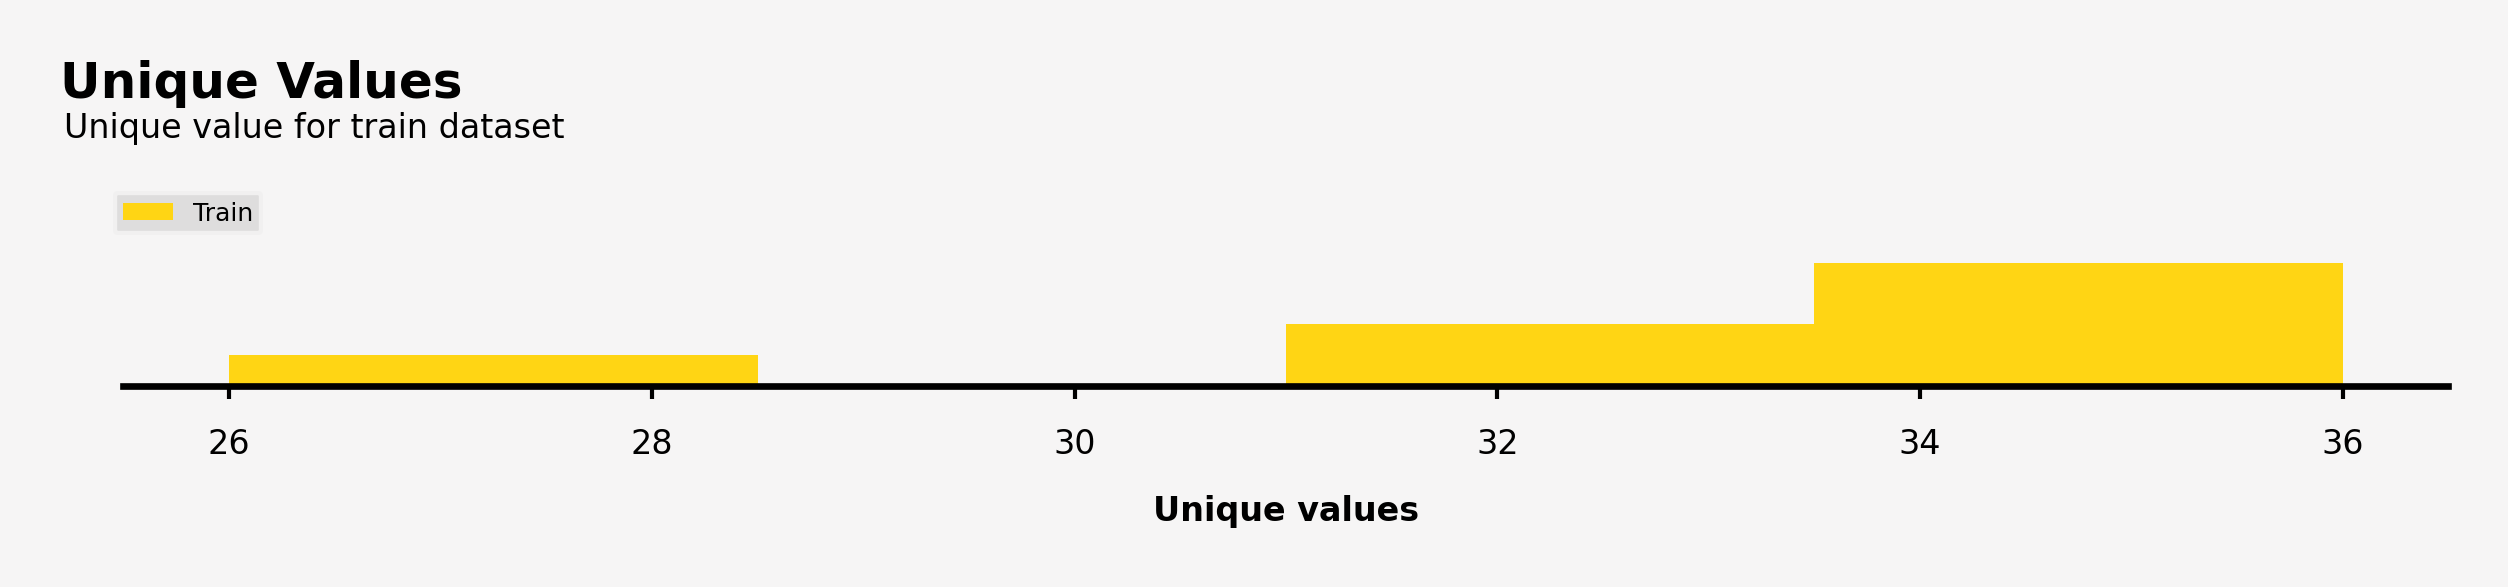

In [7]:
features = [feature for feature in df.columns if feature not in ['id','State/UTs']]

unique_values_train = np.zeros(2)
for feature in features:
    temp = df[feature].unique()
    unique_values_train = np.concatenate([unique_values_train, temp])
unique_values_train = np.unique(unique_values_train)

unique_value_feature_train = pd.DataFrame(df[features].nunique())
unique_value_feature_train = unique_value_feature_train.reset_index(drop=False)
unique_value_feature_train.columns = ['Features', 'Count']

plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(5, 0.8), facecolor='#f6f5f5')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0.4, hspace=0.8)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514'])

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top", "left"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)
ax0.tick_params(axis = "y", which = "both", left = False)

ax0_sns = sns.histplot(ax=ax0, x=unique_value_feature_train['Count'], zorder=2, linewidth=0, alpha=1)
ax0_sns.set_xlabel("Unique values",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.get_yaxis().set_visible(False)

ax0.text(25.2, 10.6, 'Unique Values', fontsize=6, ha='left', va='top', weight='bold')
ax0.text(25.22, 8.9, 'Unique value for train dataset', fontsize=4, ha='left', va='top')
ax0_sns.legend(['Train', 'Test'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=3, bbox_to_anchor=(-0.01, 1.6), loc='upper left')

plt.show()

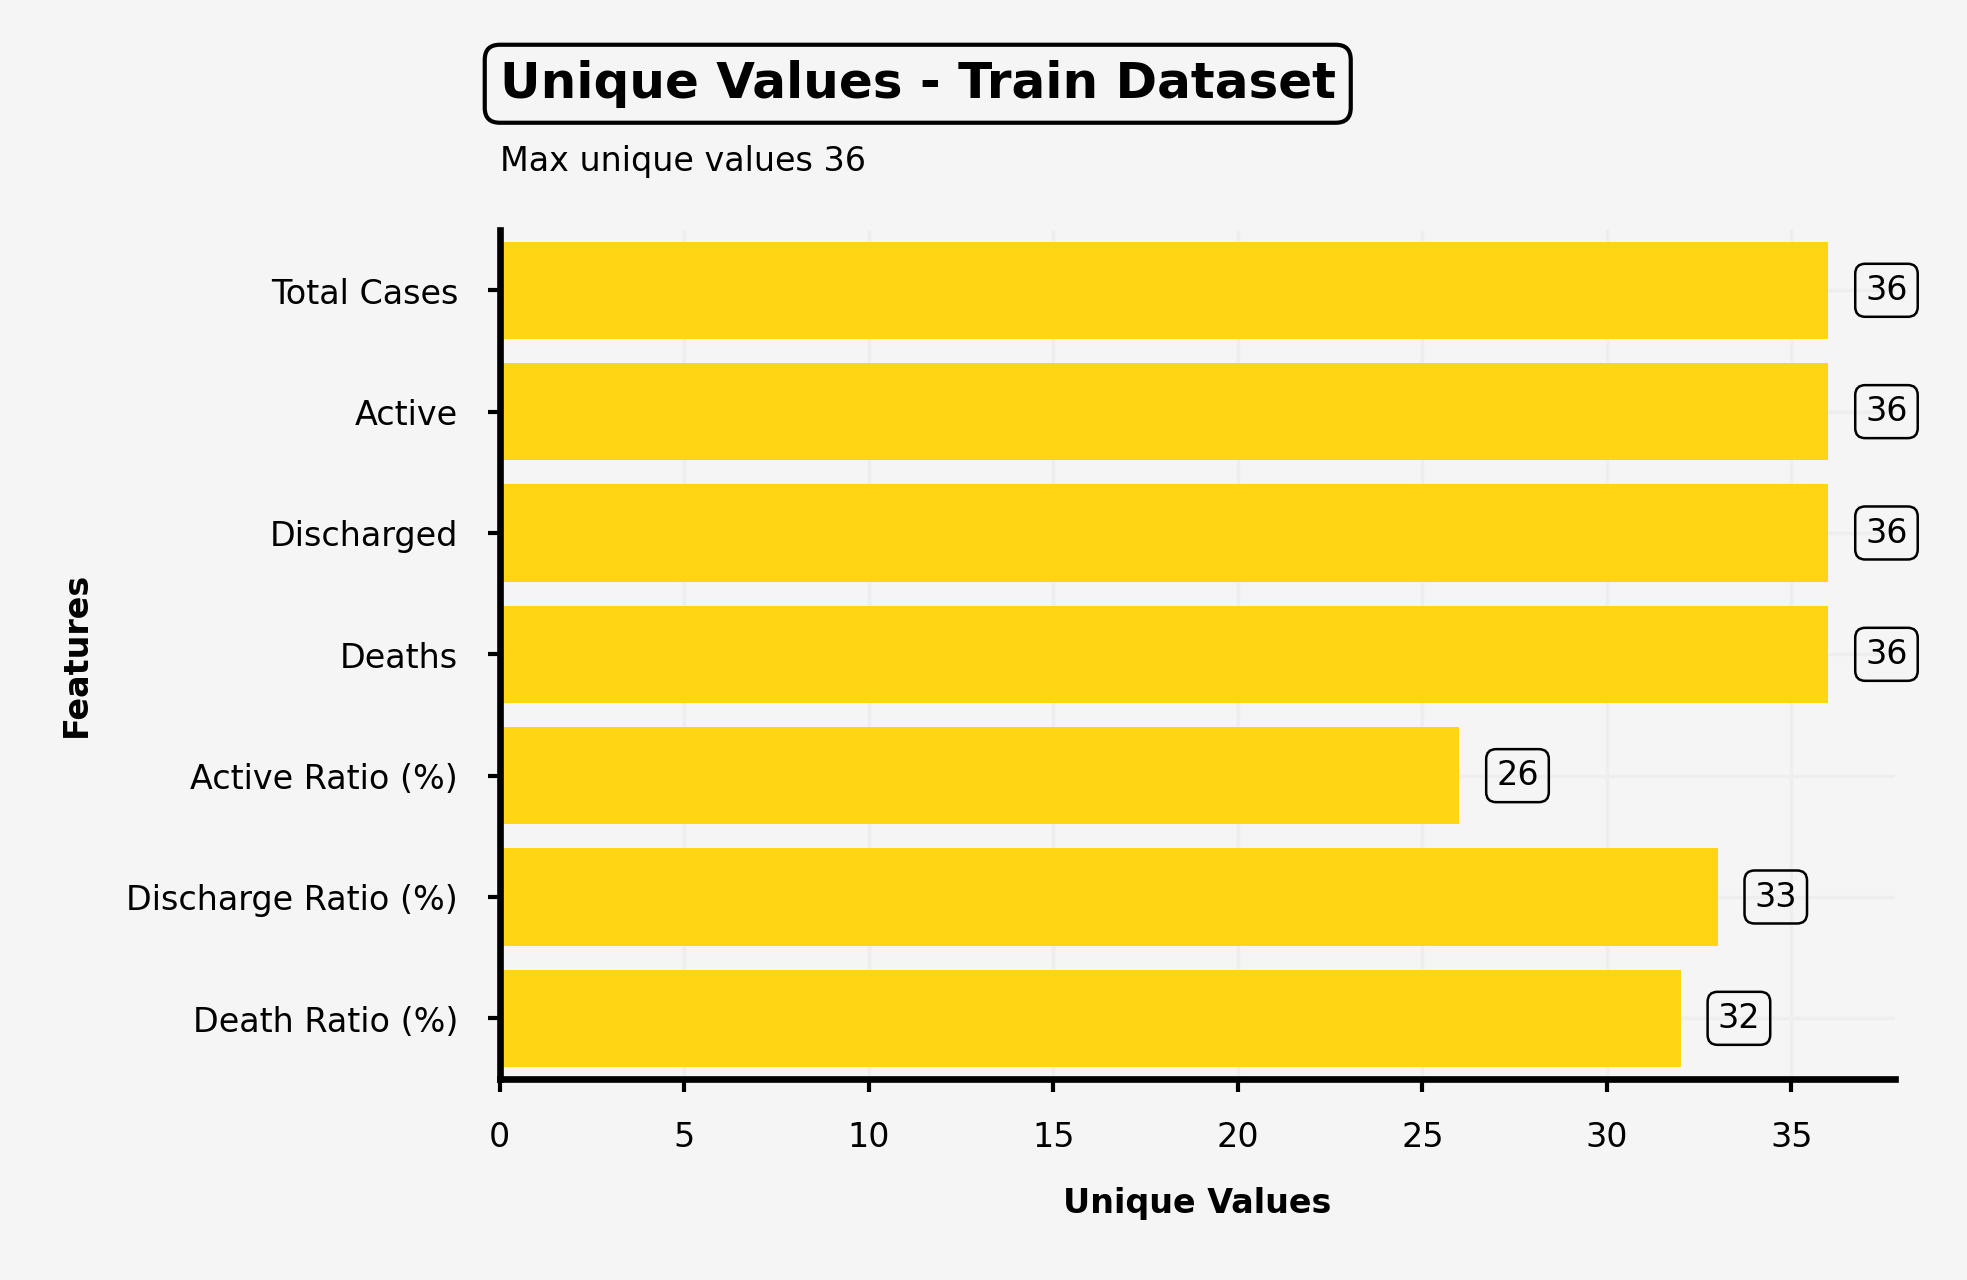

In [8]:
plt.rcParams['figure.dpi'] = 600
fig = plt.figure(figsize=(3, 6), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 1)
gs.update(wspace=0.4, hspace=0.1)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*75)

ax0 = fig.add_subplot(gs[0, 0])
for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
ax0.set_facecolor(background_color)
ax0_sns = sns.barplot(ax=ax0, y=unique_value_feature_train['Features'], x=unique_value_feature_train['Count'],
                      zorder=2, linewidth=0, orient='h', saturation=1, alpha=1)
ax0_sns.set_xlabel("Unique Values",fontsize=4, weight='bold')
ax0_sns.set_ylabel("Features",fontsize=4, weight='bold')
ax0_sns.tick_params(labelsize=4, width=0.5, length=1.5)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0.text(0, -1.9, 'Unique Values - Train Dataset', fontsize=6, ha='left', va='top', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.5))
ax0.text(0, -1.2, 'Max unique values 36', fontsize=4, ha='left', va='top')
for p in ax0.patches:
    value = f'{p.get_width():.0f}'
    x = p.get_x() + p.get_width() + 1
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='left', va='center', fontsize=4, 
            bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

ax0.set_anchor('C')  

plt.show()

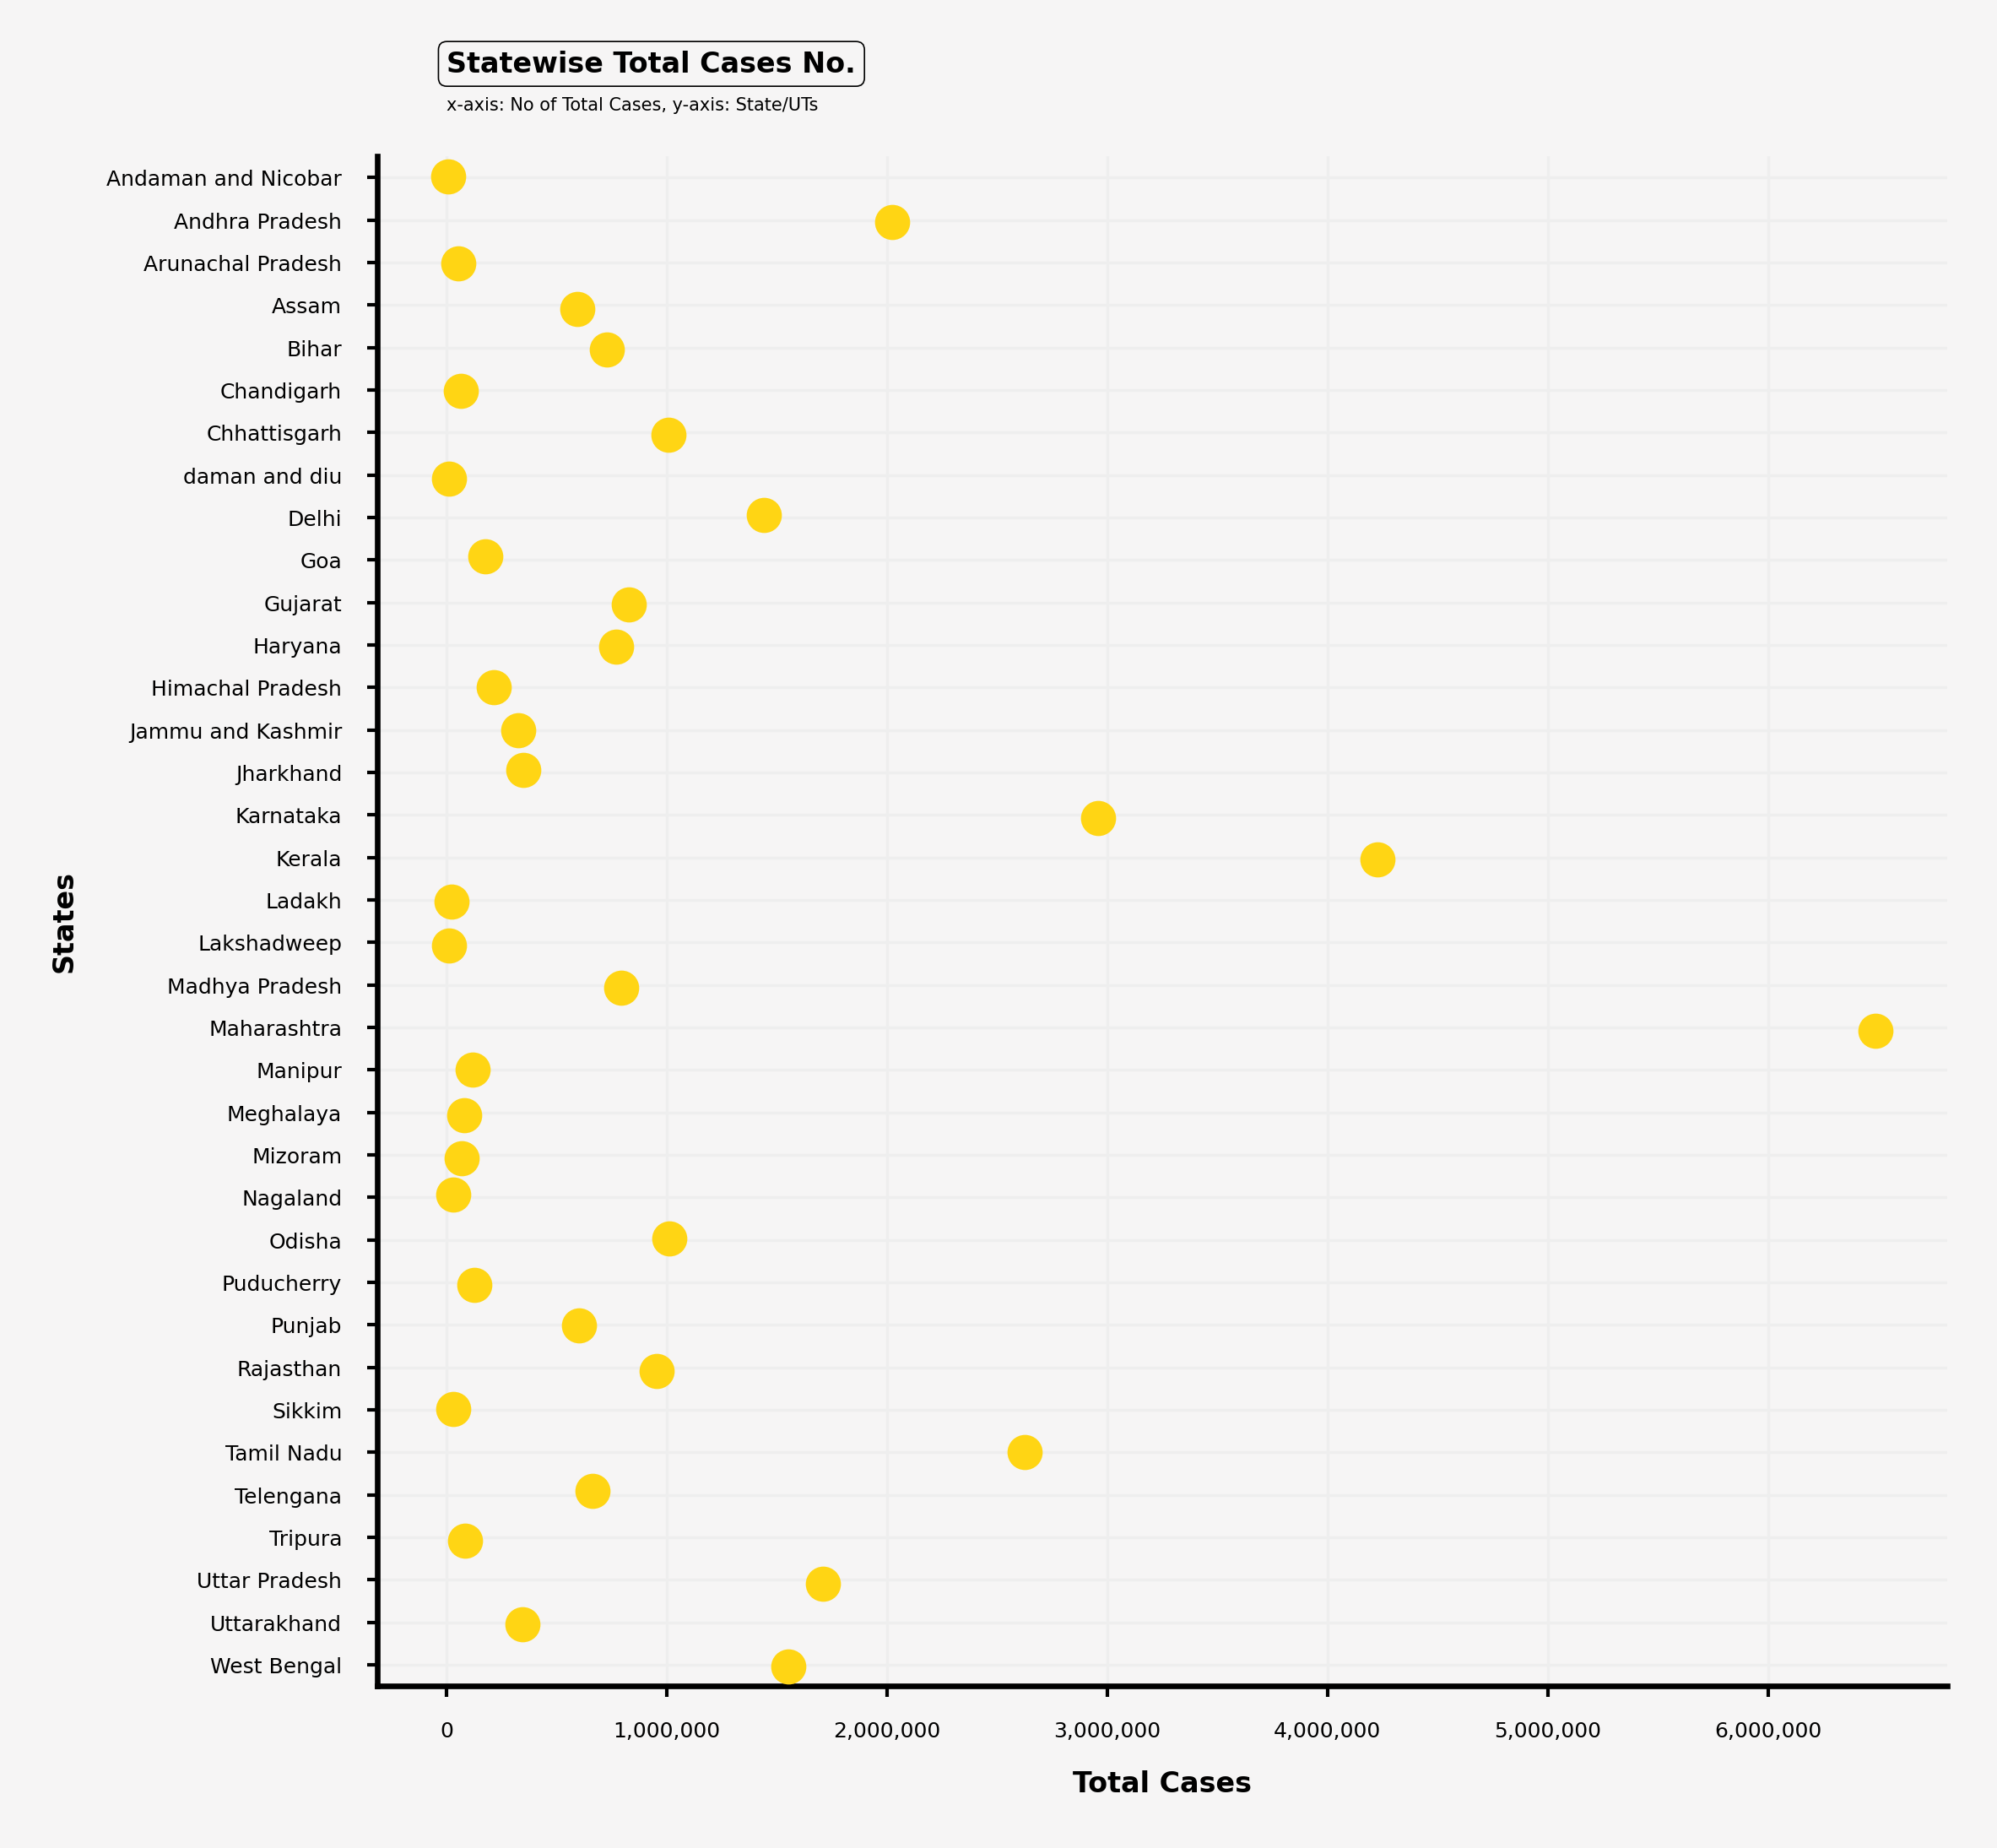

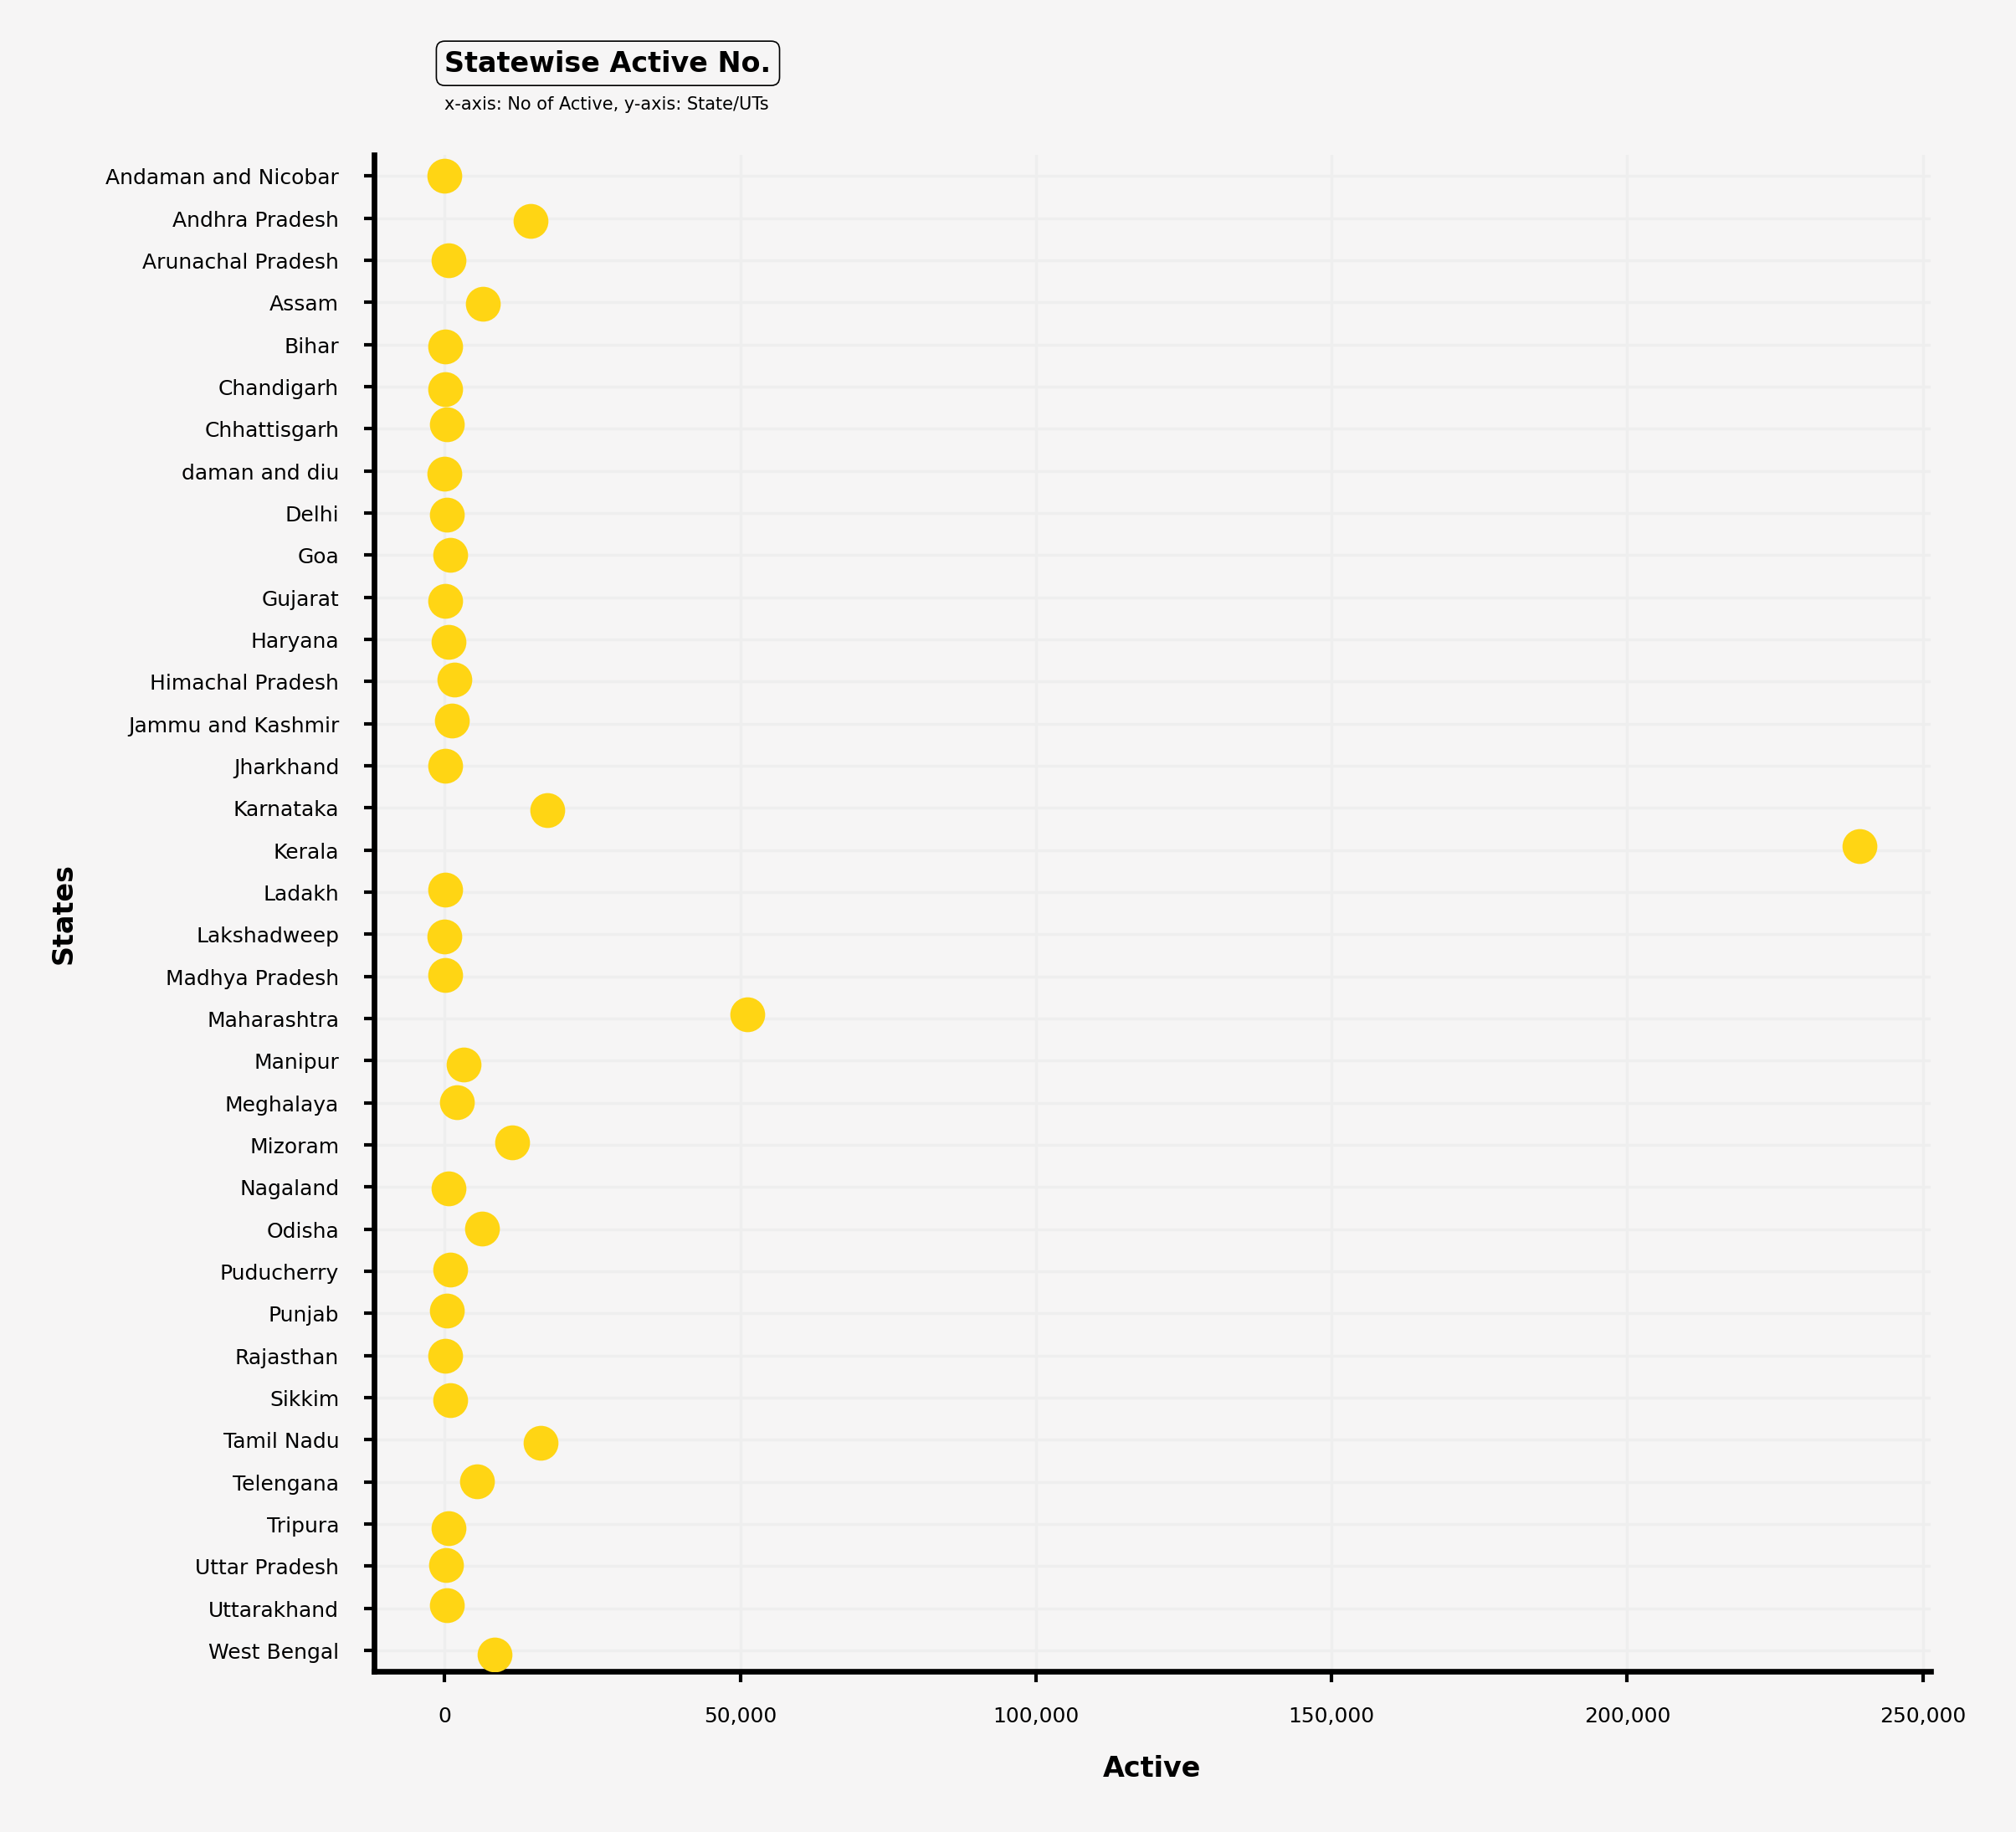

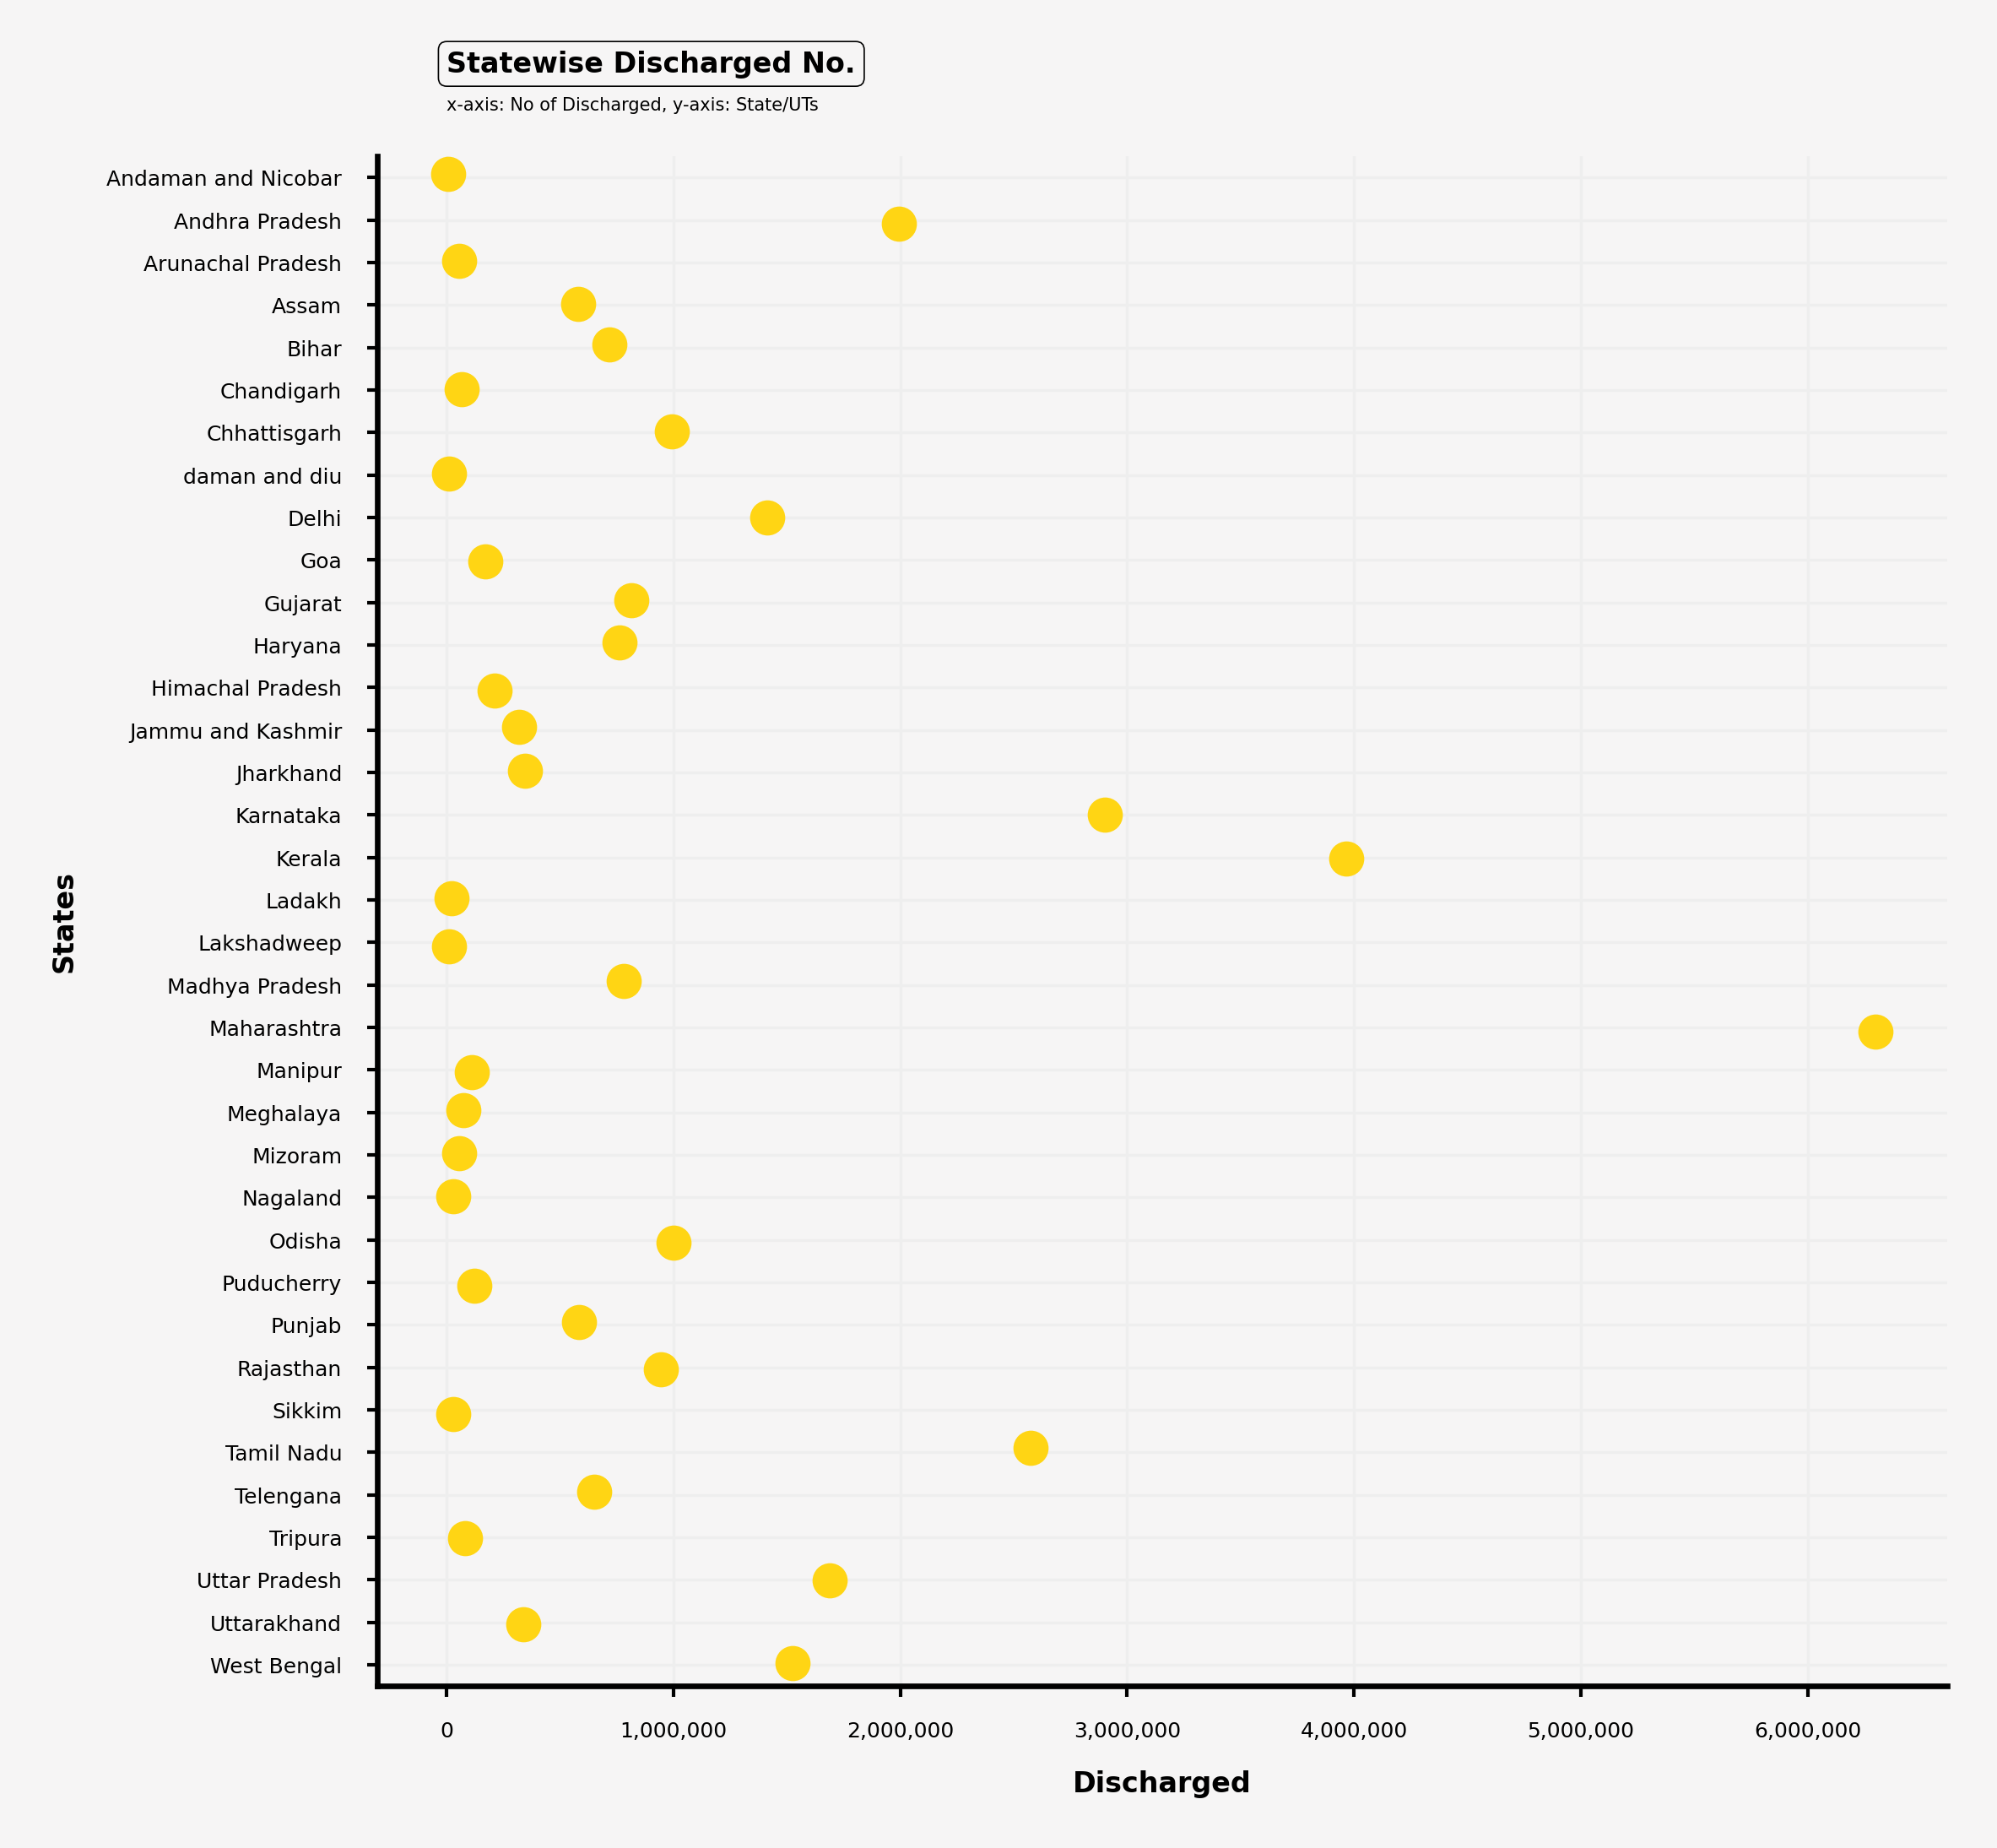

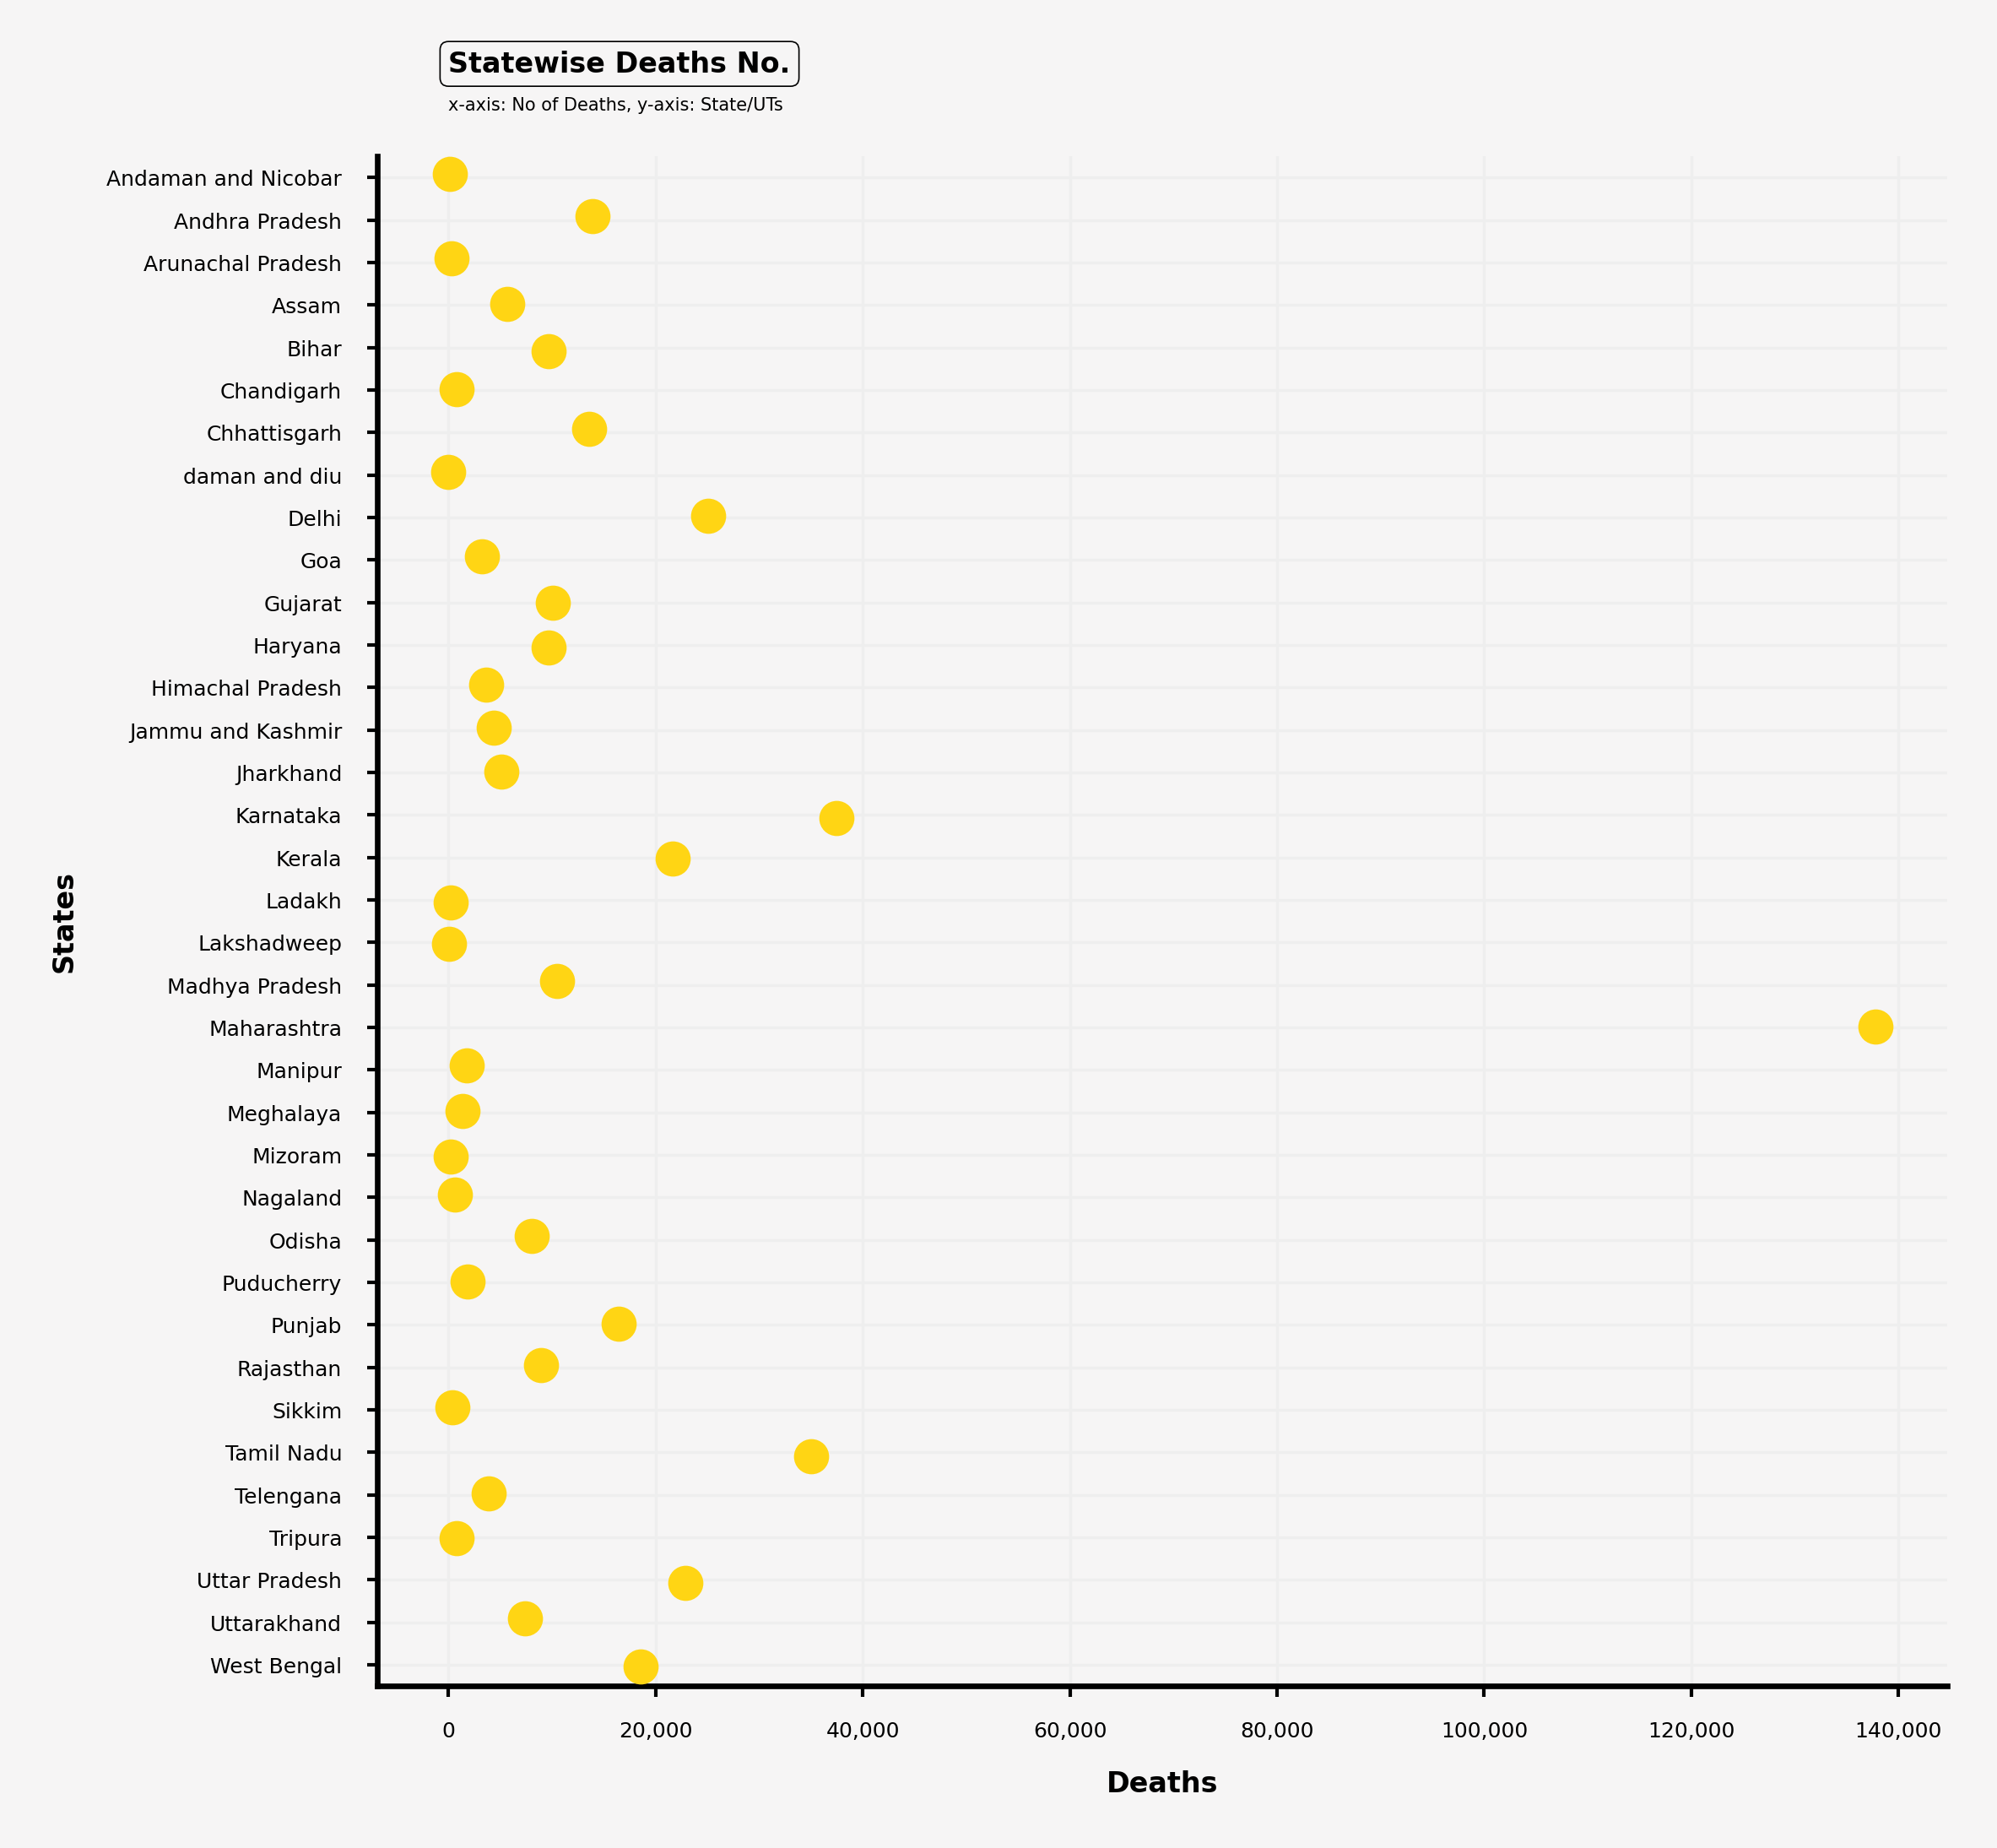

In [9]:
df['State/UTs'] = df['State/UTs'].str.replace('Dadra and Nagar Haveli and Daman and Diu','daman and diu')

plt.rcParams['figure.dpi'] = 600

df_int = [col for col in df.columns if df[col].dtypes in ['int64']]

for i in (df_int):
    fig = plt.figure(figsize=(4,4), facecolor='#f6f5f5')
    gs = fig.add_gridspec(1, 1)
    gs.update(wspace=1.5, hspace=0.05)

    background_color = "#f6f5f5"
    sns.set_palette(['#ffd514']*120)
    ax0 = fig.add_subplot(gs[0, 0])

    for s in ["right", "top"]:
        ax0.spines[s].set_visible(False)
    ax0.set_facecolor(background_color)
    ax0_sns = sns.stripplot(x=df[i],y=df['State/UTs'],ax=ax0)
    ax0_sns.set_xlabel(i,fontsize=4, weight='bold',)
    ax0_sns.set_ylabel("States",fontsize=4, weight='bold')

    ax0_sns.tick_params(labelsize=3, width=0.5, length=1.5)
    ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
    ax0.text(0, -3, f'Statewise {i} No.', fontsize=4, ha='left', va='top', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
    ax0.text(0, -1.90, f'x-axis: No of {i}, y-axis: State/UTs', fontsize=2.5, ha='left', va='top')
    ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Text(-8500000, 690000, 'Total Cases and Discharged Correlation: 0.9')

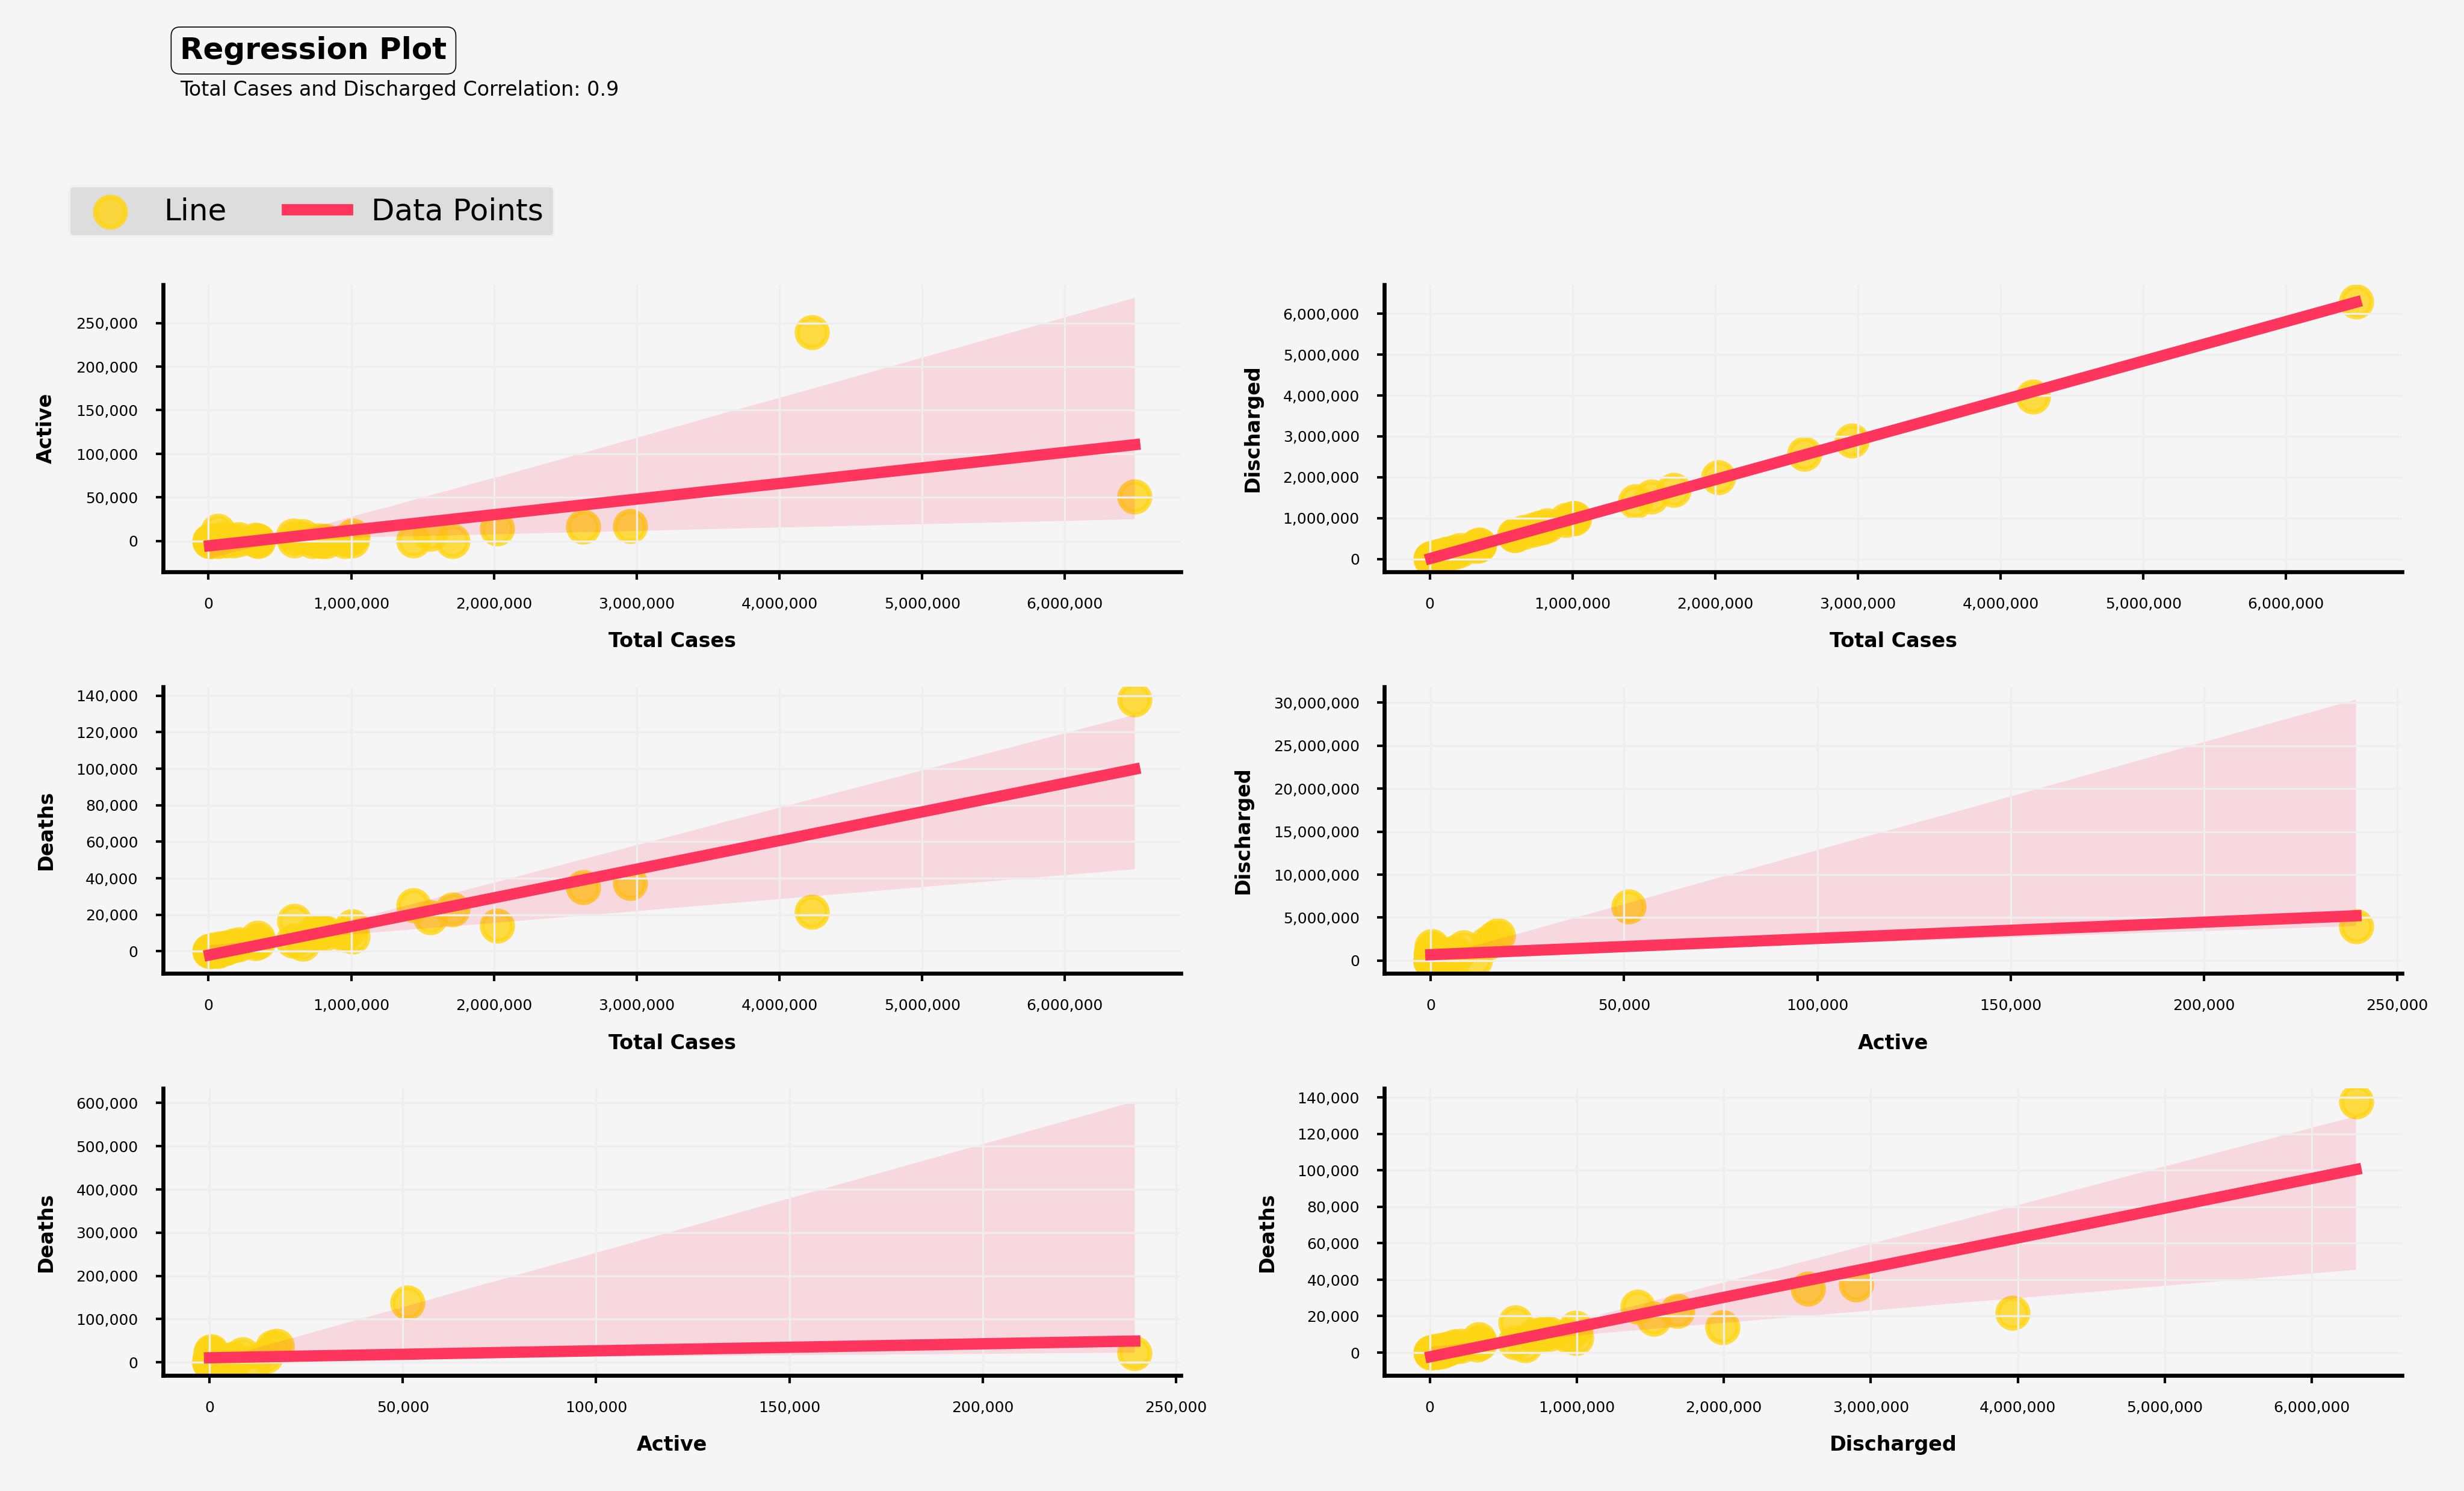

In [10]:
from itertools import combinations

plot = list(combinations(df_int, 2))


plt.rcParams['figure.dpi'] = 600


fig = plt.figure(figsize=(8,4), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 2)
gs.update(wspace=0.2, hspace=0.4)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*120)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 0])
ax5 = fig.add_subplot(gs[2, 1])


for indx, i in enumerate(plot):
    x = i[0]
    y = i[1]


    for s in ["right", "top"]:
        locals()['ax' + str(indx)].spines[s].set_visible(False)

    ax_sns = sns.regplot(x=df[x],y=df[y],ax=locals()['ax' + str(indx)],line_kws={'color': '#ff355d','alpha':1})


    locals()['ax' + str(indx)].set_facecolor(background_color)
    ax_sns.set_xlabel(x,fontsize=4, weight='bold',)
    ax_sns.set_ylabel(y,fontsize=4, weight='bold')

    ax_sns.tick_params(labelsize=3, width=0.5, length=1.5)
    ax_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    ax_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

    locals()['ax' + str(indx)].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    locals()['ax' + str(indx)].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
ax_sns.legend(['Line', 'Data Points'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=6, bbox_to_anchor=(-0.8, 4.2), loc='upper right')
ax_sns.text(-8500000, 710000, f'Regression Plot', fontsize=6, weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
ax_sns.text(-8500000, 690000, f'Total Cases and Discharged Correlation: 0.9', fontsize=4)

Text(81.2, 34.5, 'Active & Discharge Correlation: -1.0')

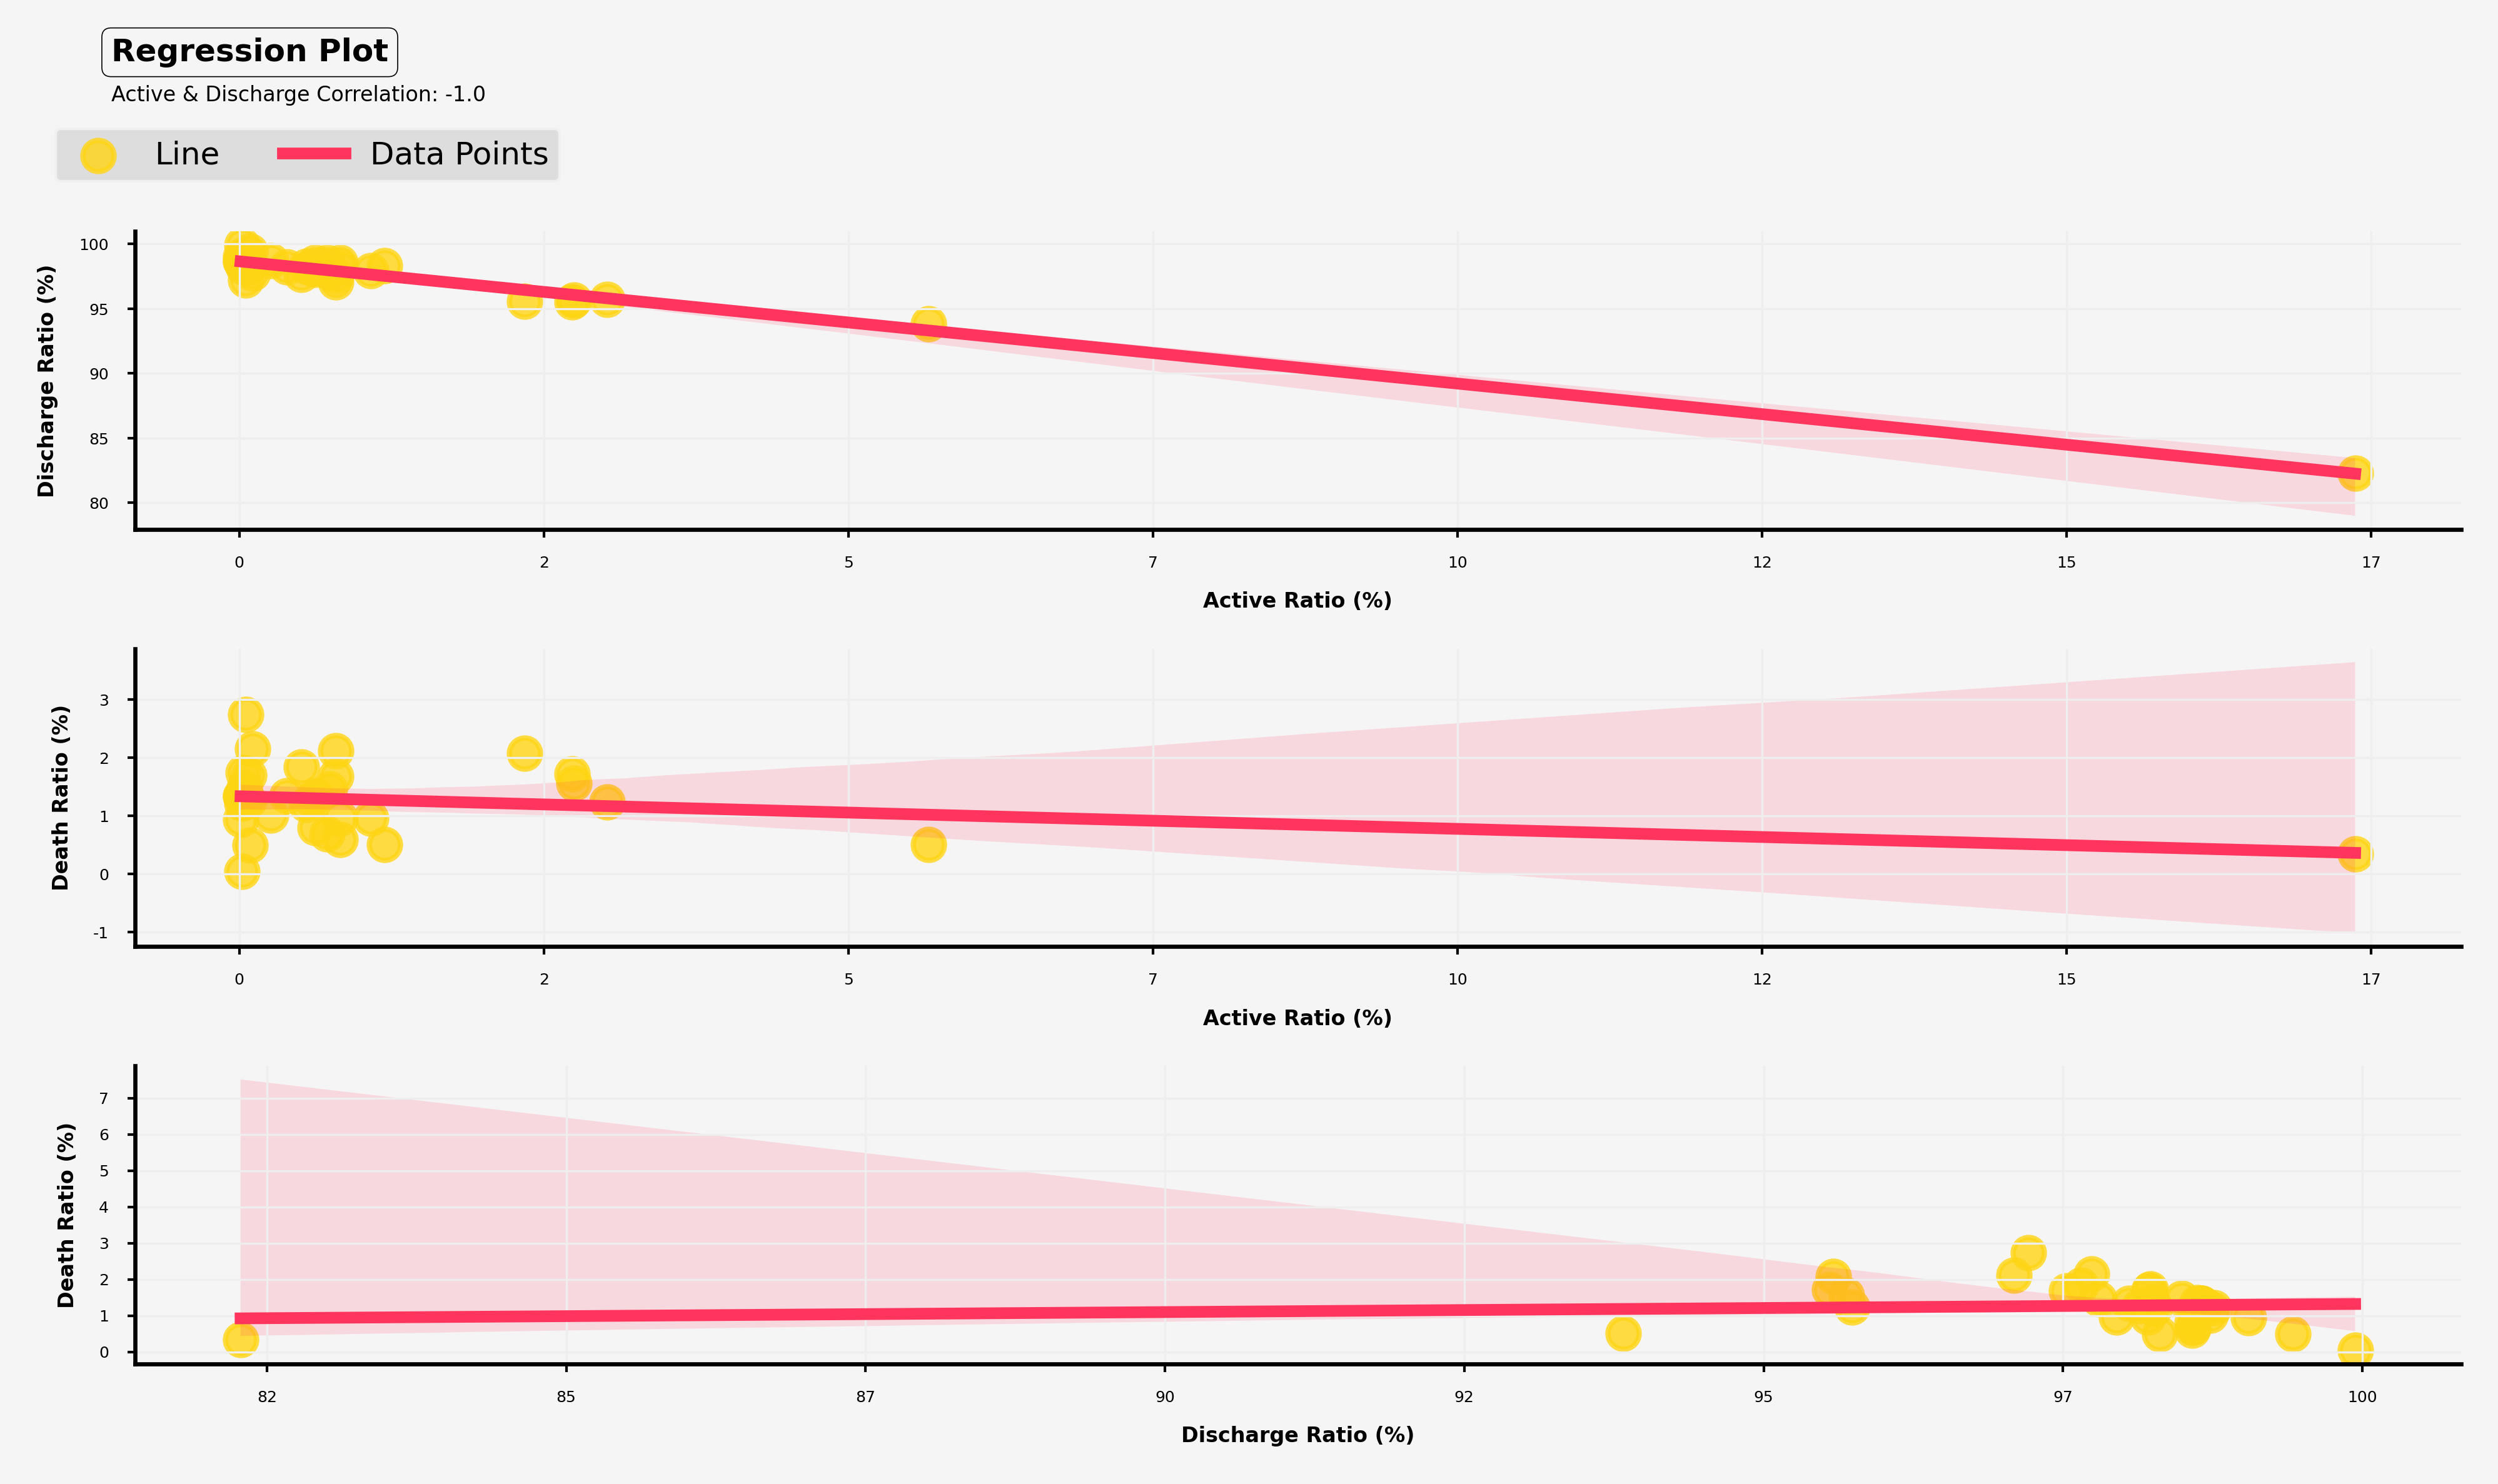

In [11]:
from itertools import combinations

df_float = [col for col in df.columns if df[col].dtypes in ['float64']]

plot = list(combinations(df_float, 2))


plt.rcParams['figure.dpi'] = 600


fig = plt.figure(figsize=(8,4), facecolor='#f6f5f5')
gs = fig.add_gridspec(3, 1)
gs.update(wspace=0.2, hspace=0.4)

background_color = "#f6f5f5"
sns.set_palette(['#ffd514']*120)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 0])
ax2 = fig.add_subplot(gs[2, 0])

for indx, i in enumerate(plot):
    x = i[0]
    y = i[1]


    for s in ["right", "top"]:
        locals()['ax' + str(indx)].spines[s].set_visible(False)

    ax_sns = sns.regplot(x=df[x],y=df[y],ax=locals()['ax' + str(indx)],line_kws={'color': '#ff355d','alpha':1})


    locals()['ax' + str(indx)].set_facecolor(background_color)
    ax_sns.set_xlabel(x,fontsize=4, weight='bold',)
    ax_sns.set_ylabel(y,fontsize=4, weight='bold')

    ax_sns.tick_params(labelsize=3, width=0.5, length=1.5)
    ax_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
    ax_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

    locals()['ax' + str(indx)].get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    locals()['ax' + str(indx)].get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    
ax_sns.legend(['Line', 'Data Points'], ncol=2, facecolor='#D8D8D8', edgecolor=background_color, fontsize=6, bbox_to_anchor=(0.19, 4.2), loc='upper right')
ax_sns.text(81.2, 35.6, f'Regression Plot', fontsize=6, weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
ax_sns.text(81.2, 34.5, f'Active & Discharge Correlation: -1.0', fontsize=4)

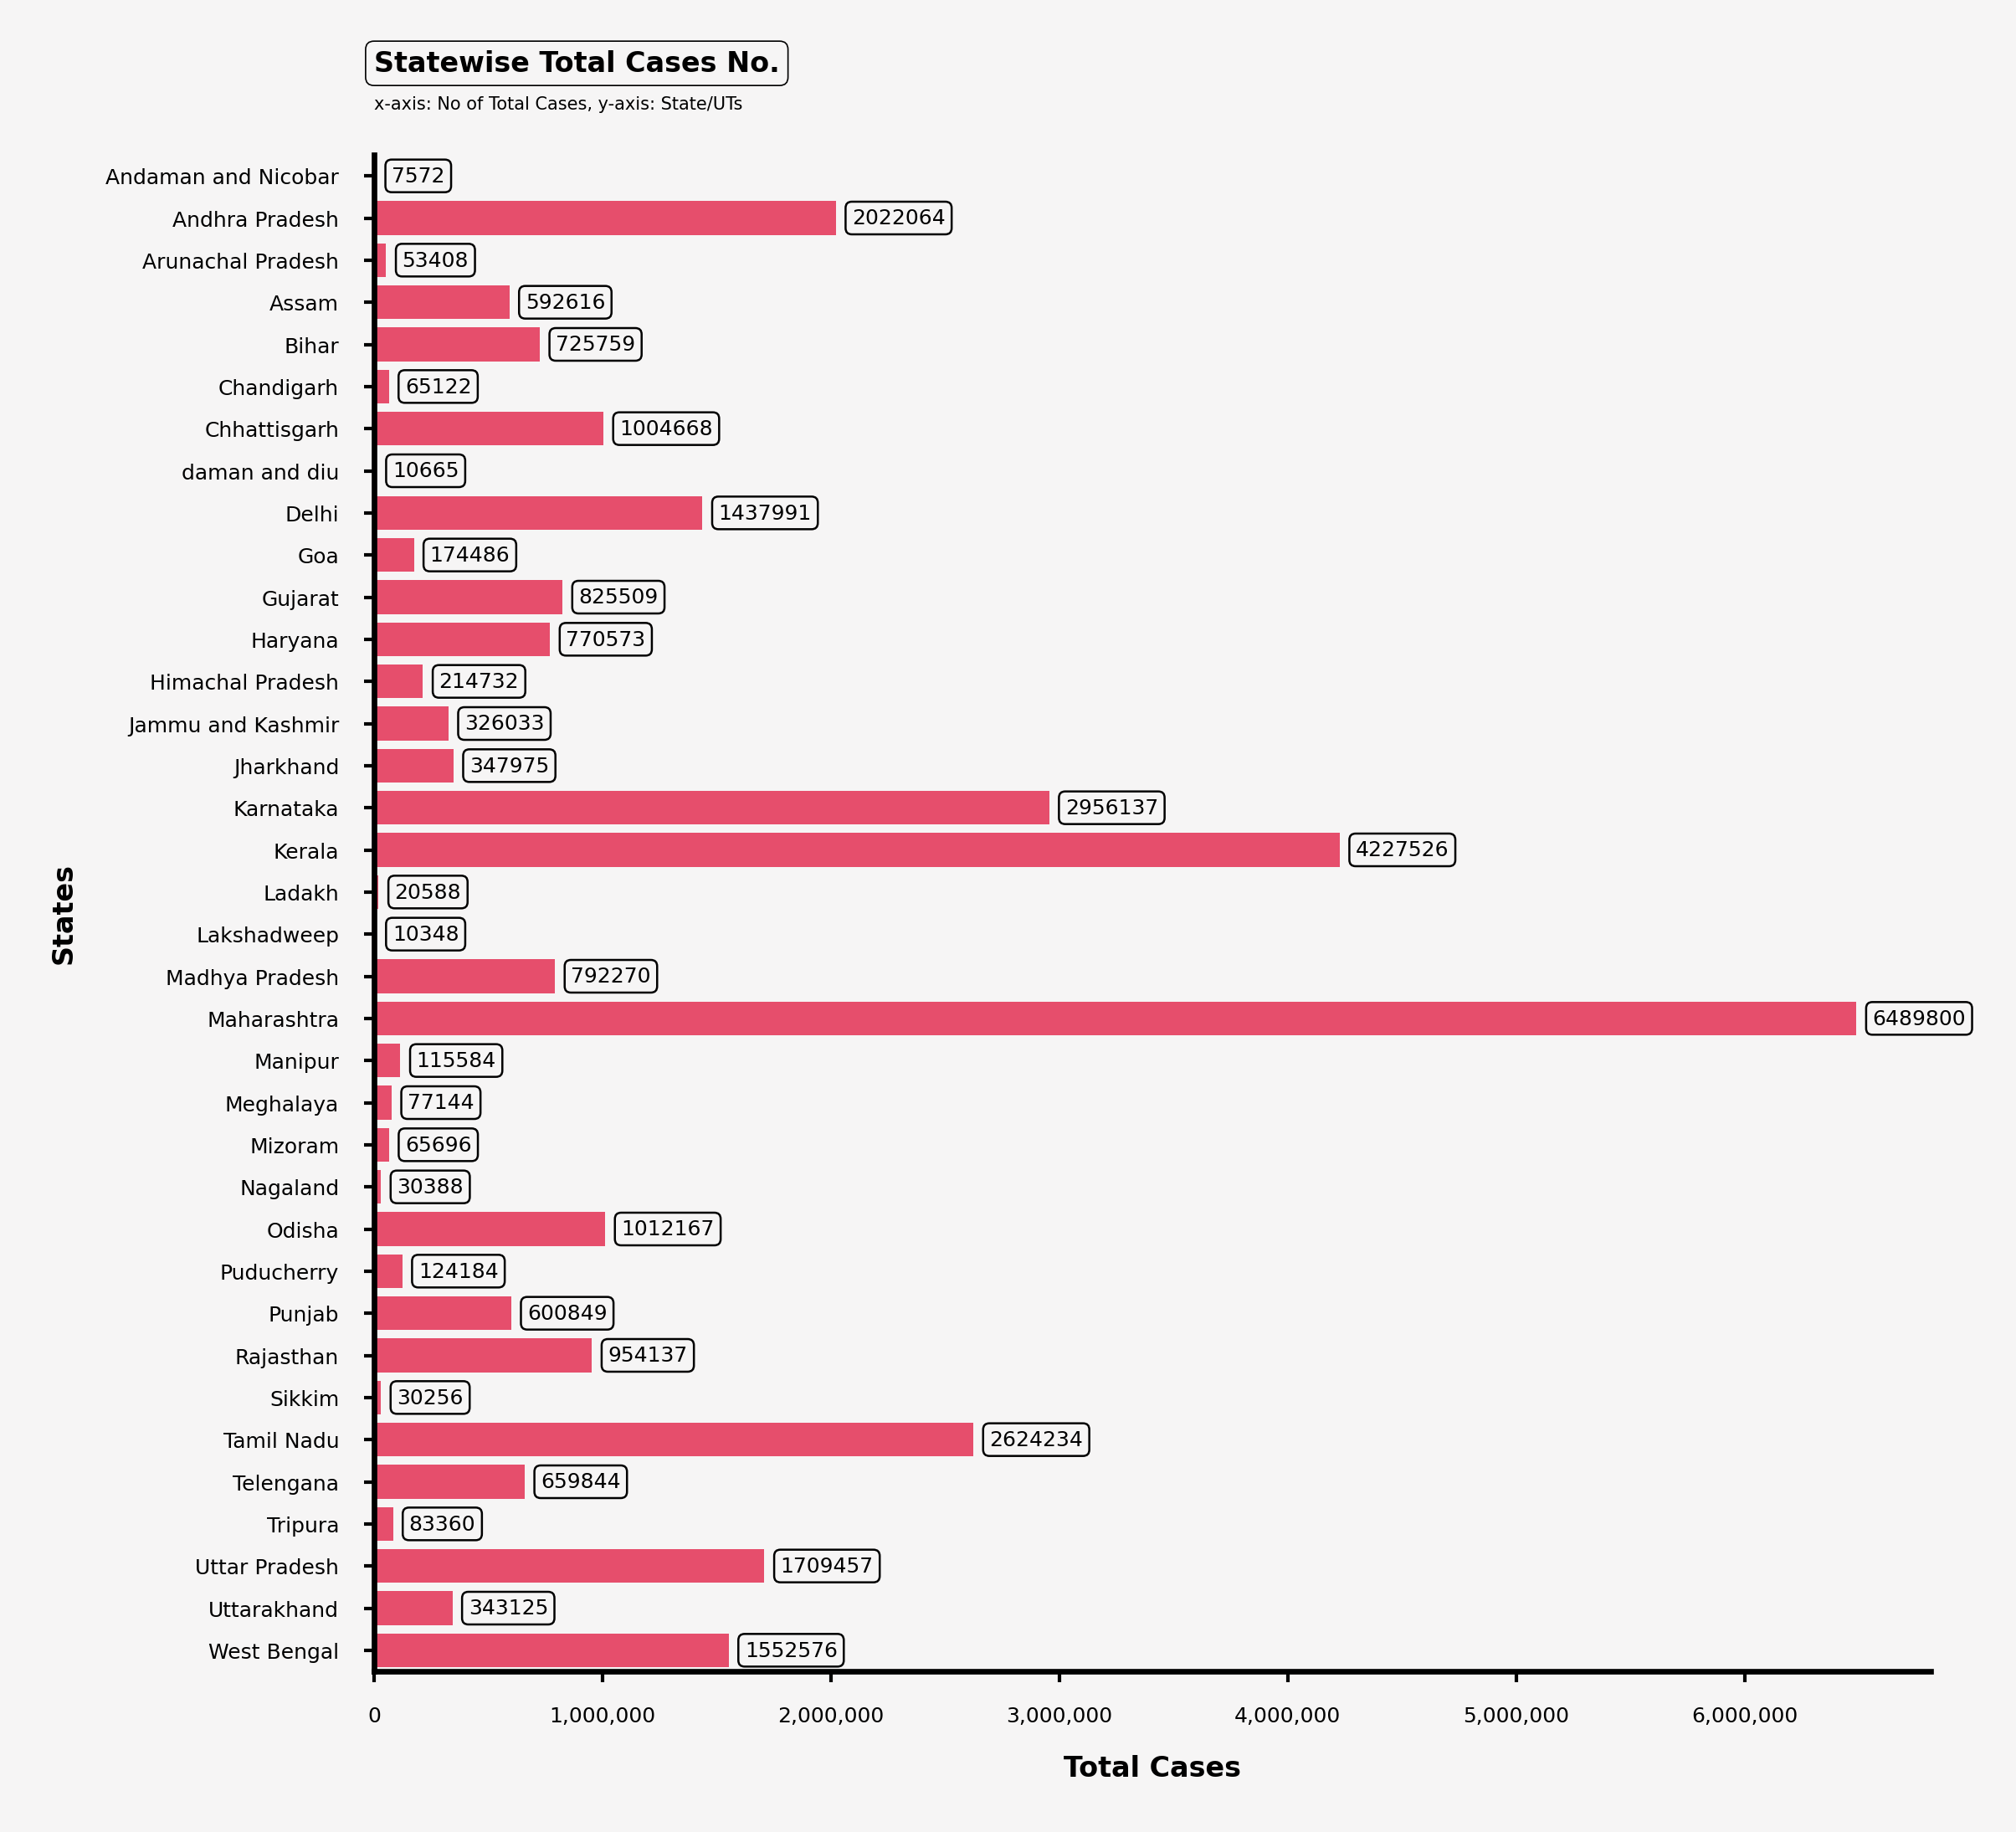

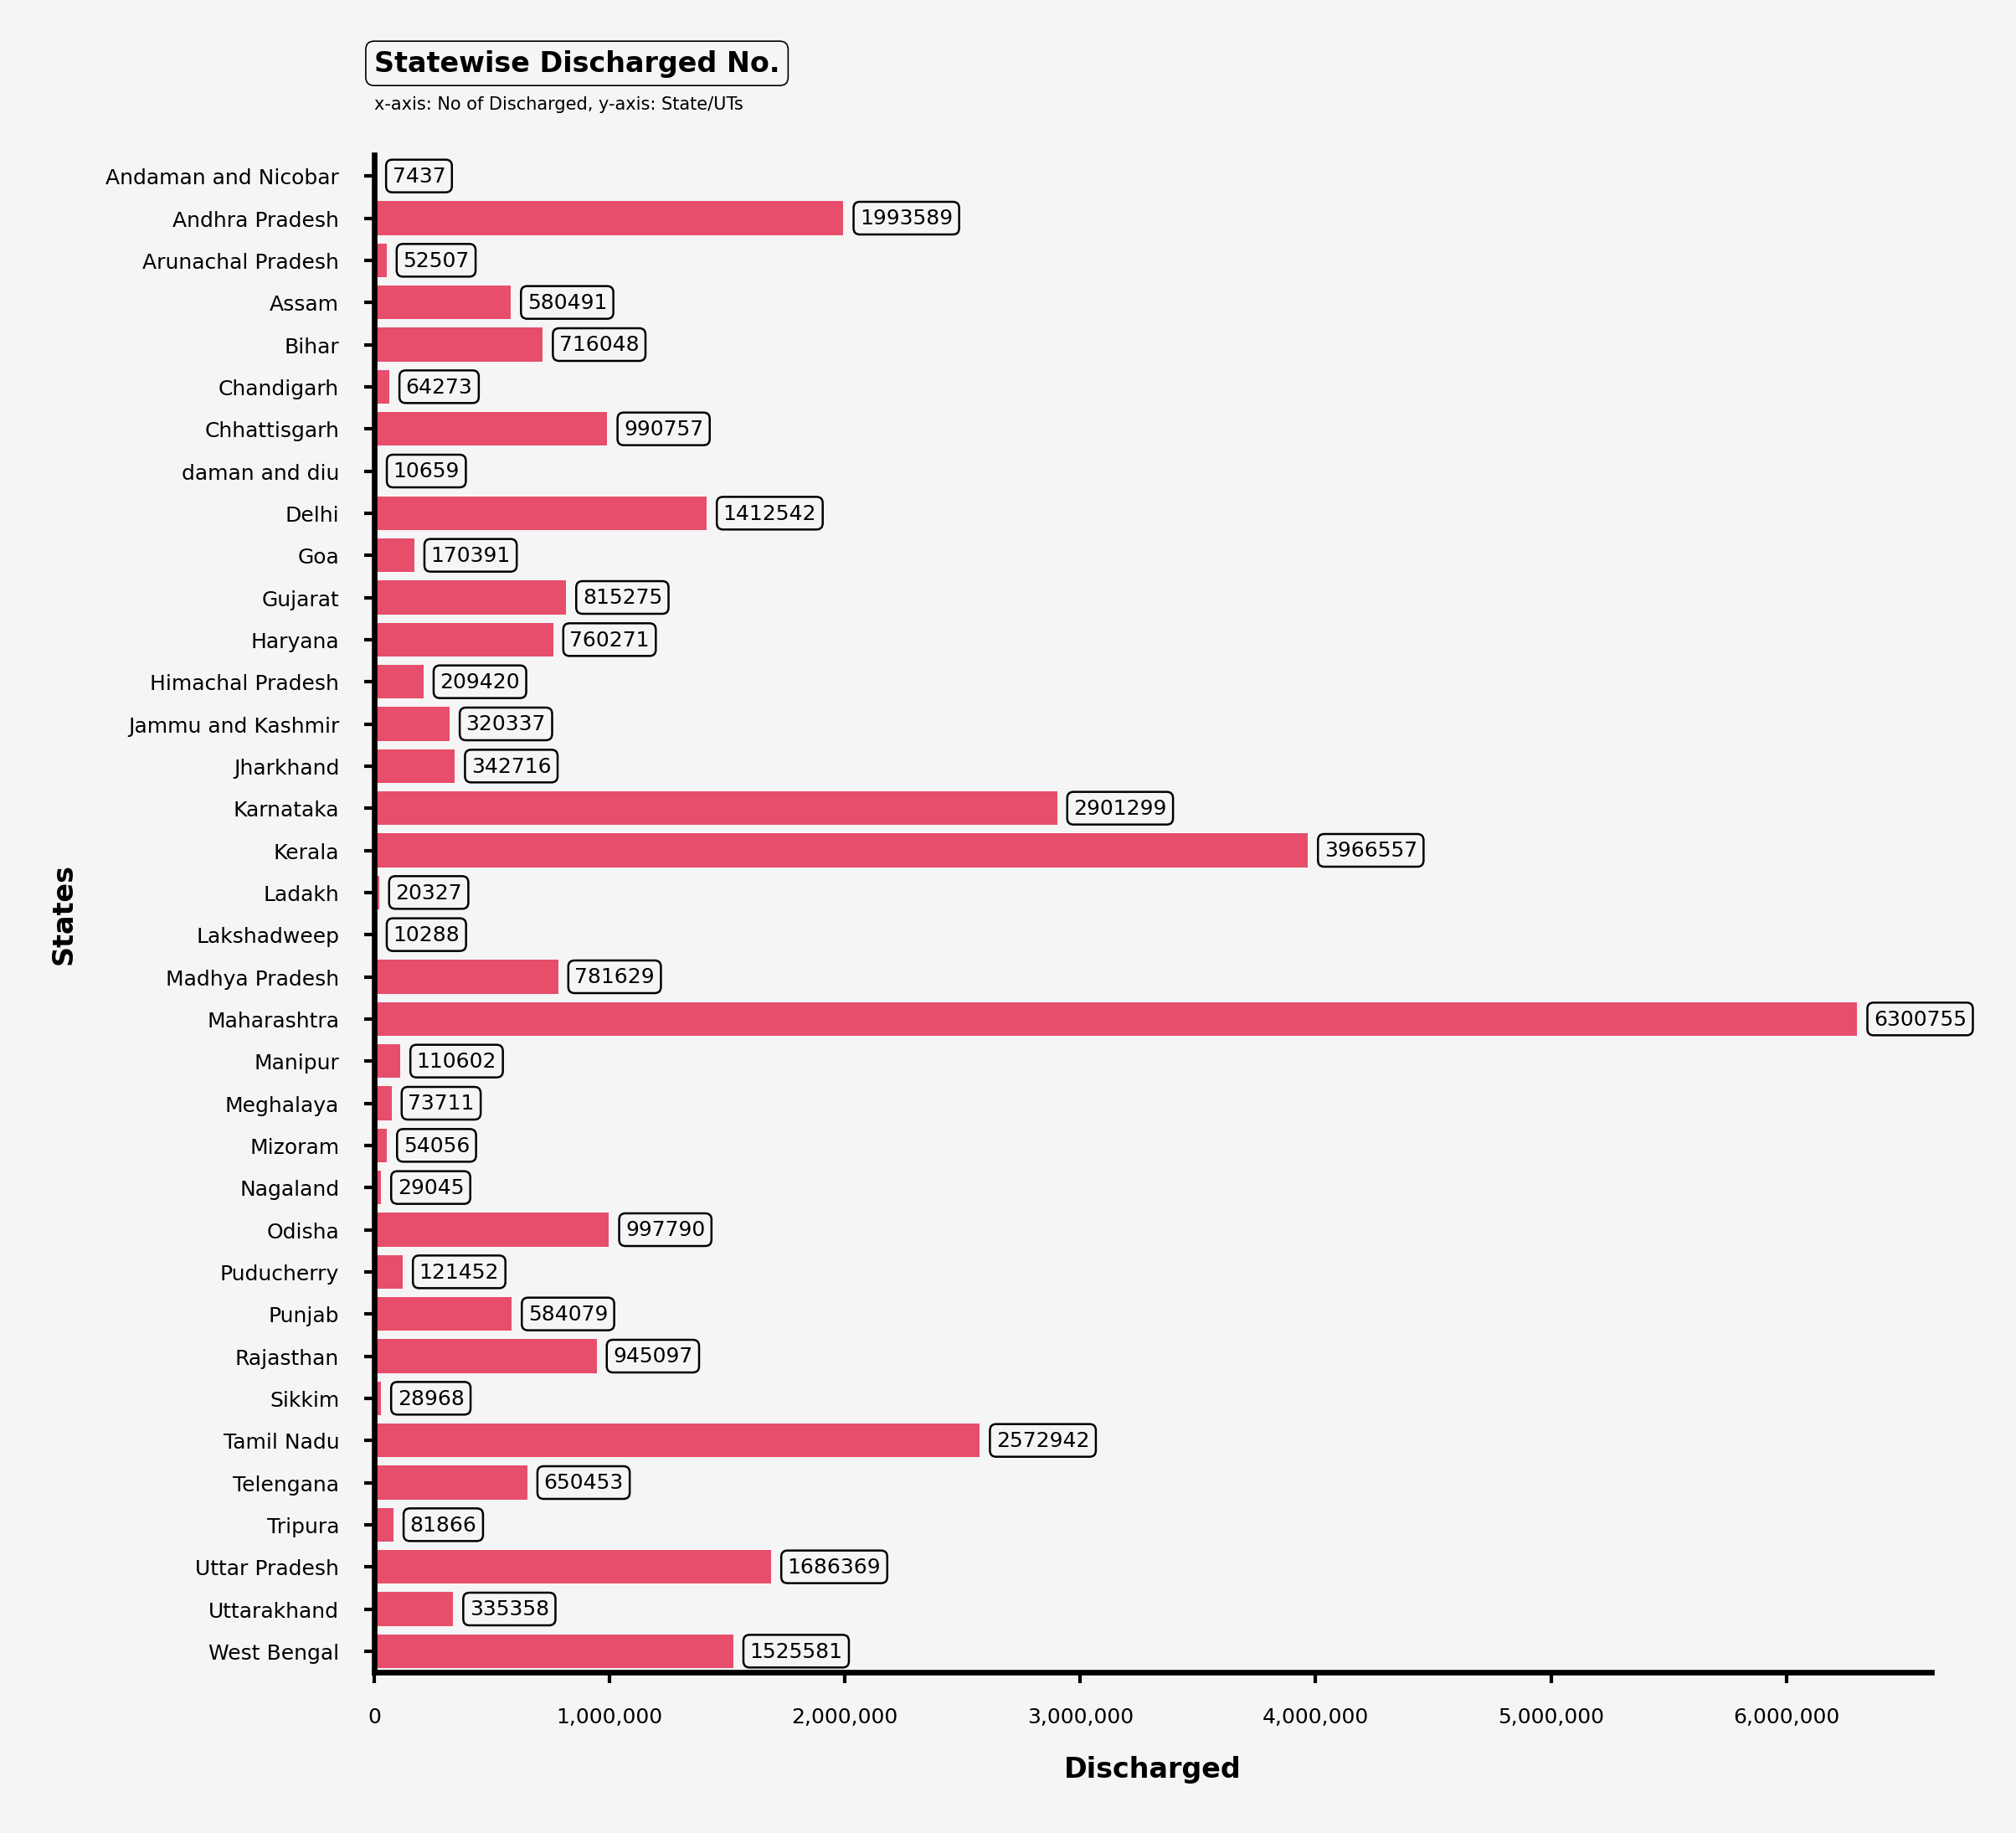

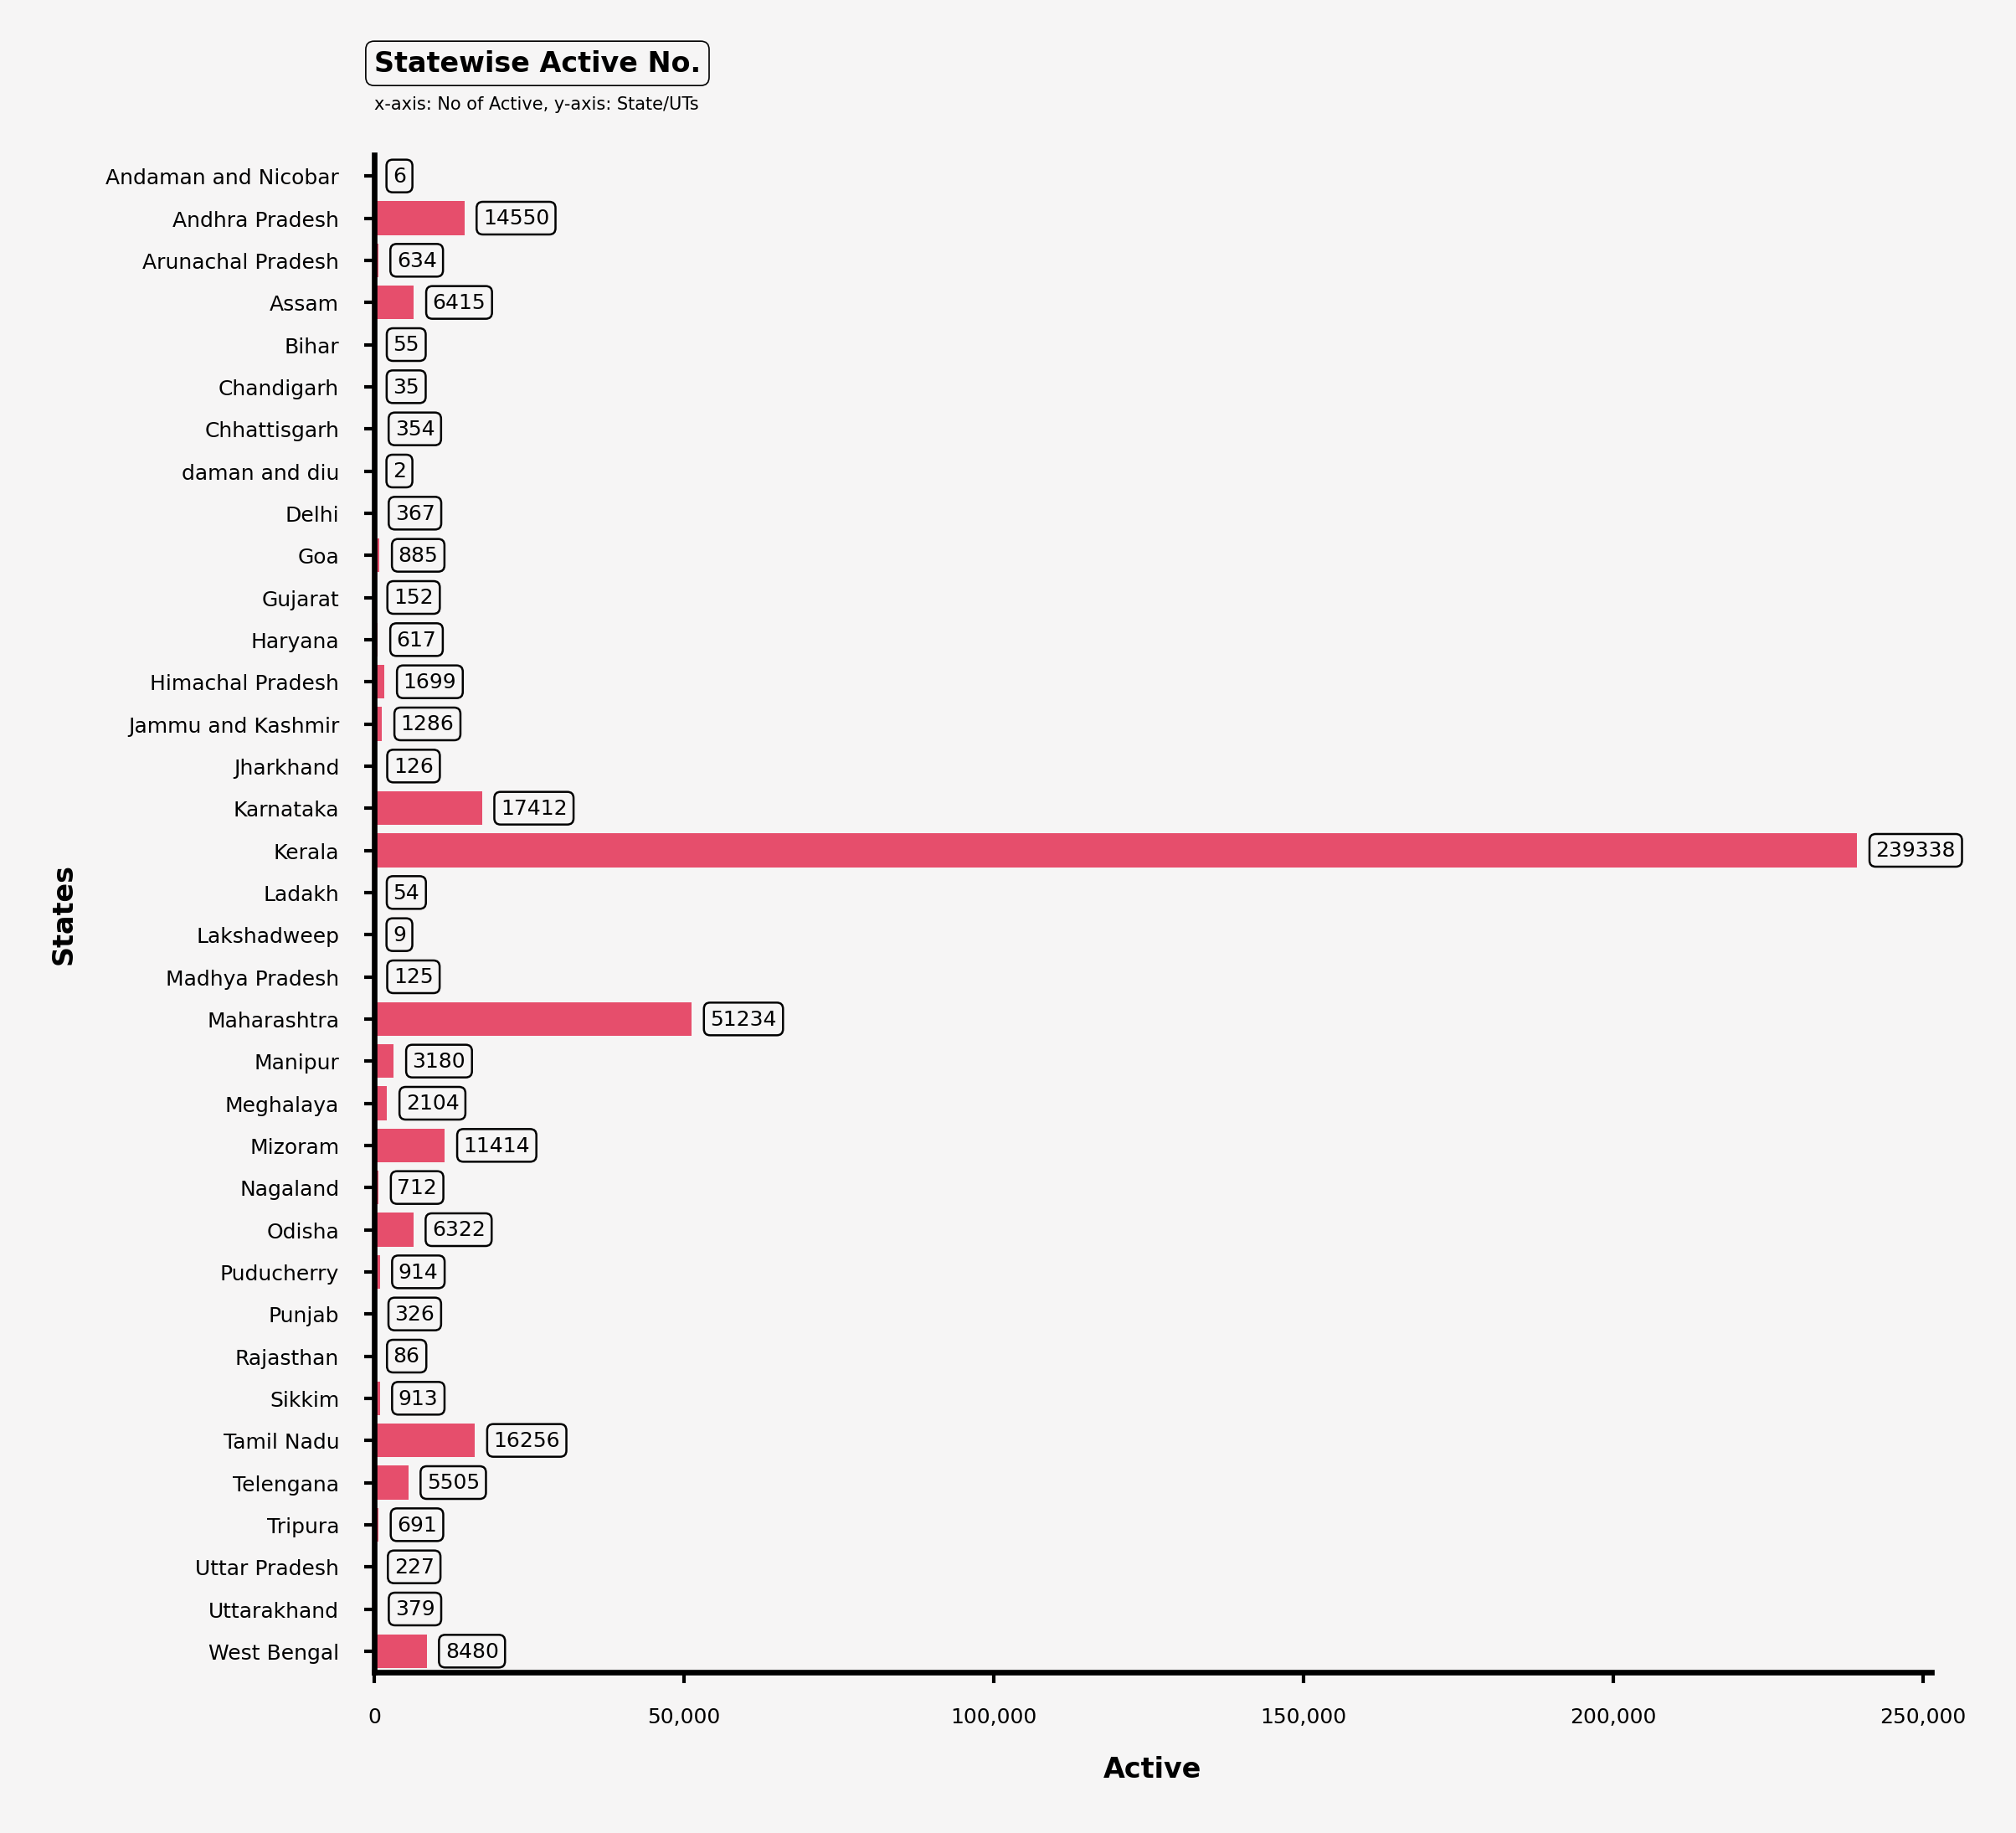

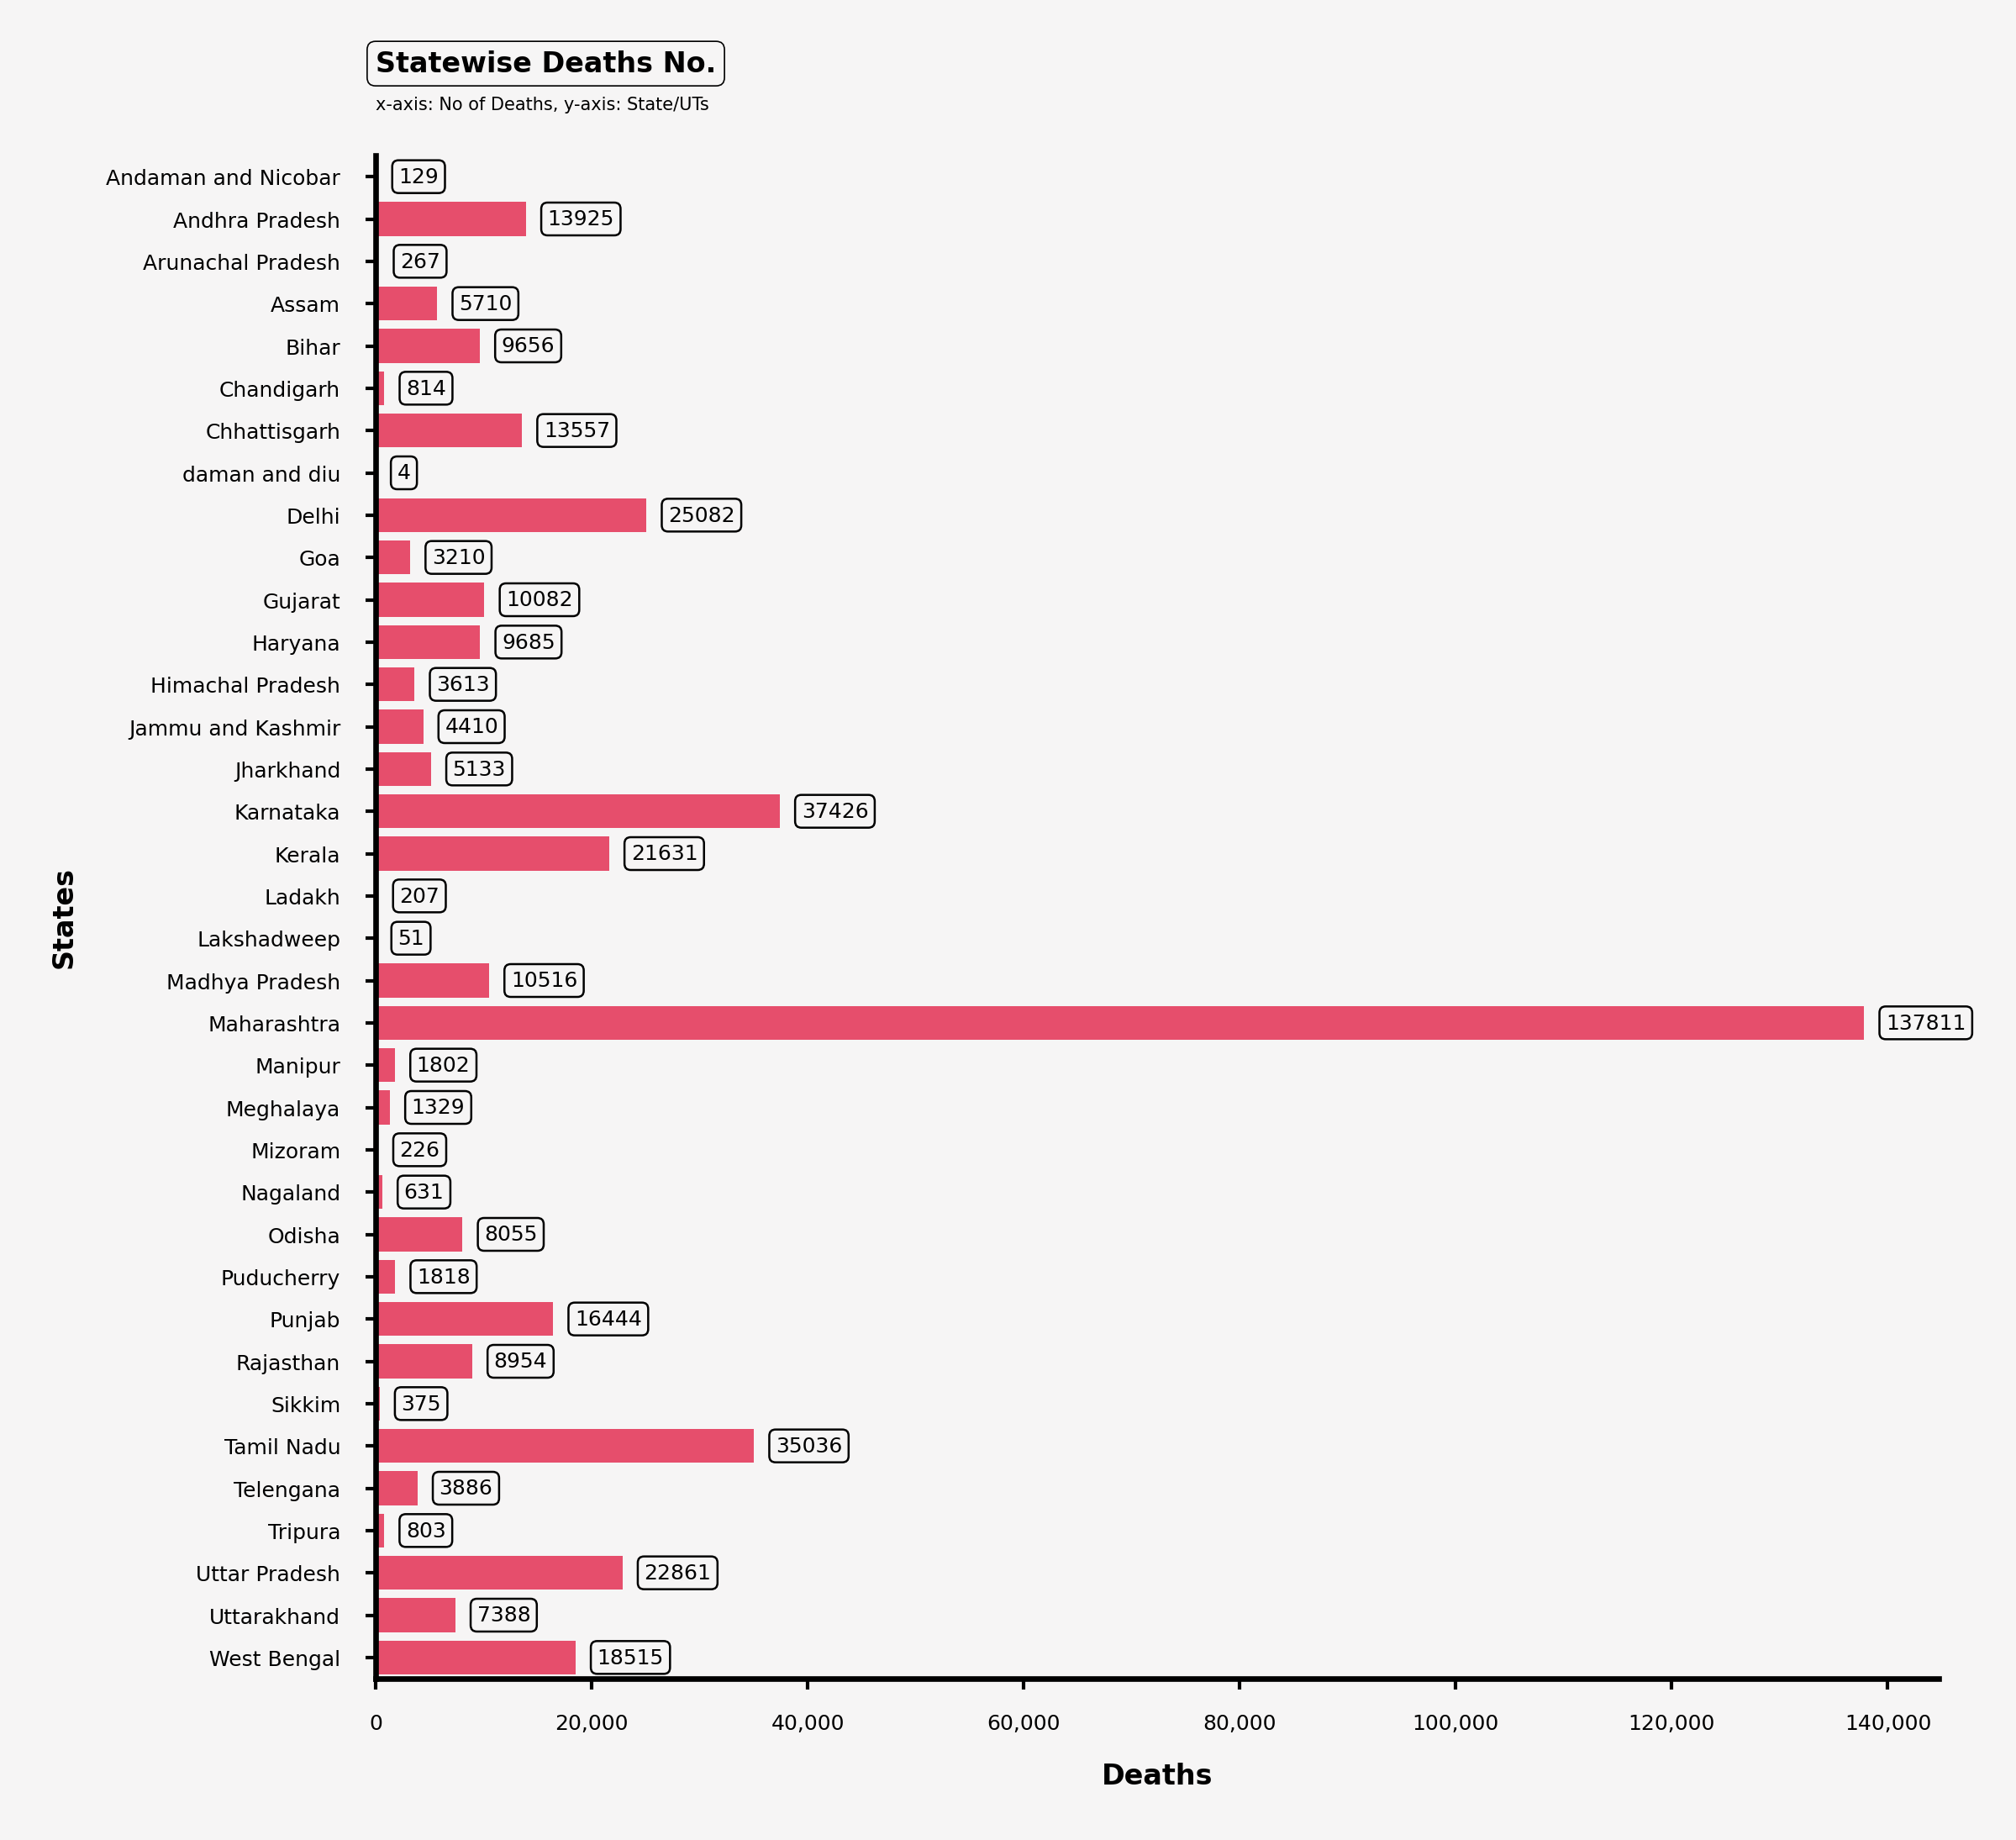

In [12]:
plt.rcParams['figure.dpi'] = 600

part1 = ['Total Cases','Discharged']


for col in part1:
    fig = plt.figure(figsize=(4,4), facecolor='#f6f5f5')
    gs = fig.add_gridspec(1, 1)
    gs.update(wspace=1.5, hspace=0.05)

    background_color = "#f6f5f5"
    sns.set_palette(['#ff355d']*120)
    ax0 = fig.add_subplot(gs[0, 0])

    for s in ["right", "top"]:
        ax0.spines[s].set_visible(False)
    ax0.set_facecolor(background_color)

    ax0.tick_params(labelsize=3, width=0.5, length=1.5)
    ax0_sns = sns.barplot(x=df[col],y=df['State/UTs'],ax=ax0)
    ax0_sns.set_xlabel(col,fontsize=4, weight='bold',)
    ax0_sns.set_ylabel("States",fontsize=4, weight='bold')

    ax0.text(0, -3, f'Statewise {col} No.', fontsize=4, ha='left', va='top', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
    ax0.text(0, -1.90, f'x-axis: No of {col}, y-axis: State/UTs', fontsize=2.5, ha='left', va='top')
    ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    for p in ax0.patches:
        value = f'{p.get_width():.0f}'
        x = p.get_x() + p.get_width() + 70000
        y = p.get_y() + p.get_height() / 2 
        ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

part2 = ['Active','Deaths']    

for col in part2:
    if col != 'Deaths':
        fig = plt.figure(figsize=(4,4), facecolor='#f6f5f5')
        gs = fig.add_gridspec(1, 1)
        gs.update(wspace=1.5, hspace=0.05)

        background_color = "#f6f5f5"
        sns.set_palette(['#ff355d']*120)
        ax0 = fig.add_subplot(gs[0, 0])

        for s in ["right", "top"]:
            ax0.spines[s].set_visible(False)
        ax0.set_facecolor(background_color)

        ax0.tick_params(labelsize=3, width=0.5, length=1.5)
        ax0_sns = sns.barplot(x=df[col],y=df['State/UTs'],ax=ax0)
        ax0_sns.set_xlabel(col,fontsize=4, weight='bold',)
        ax0_sns.set_ylabel("States",fontsize=4, weight='bold')

        ax0.text(0, -3, f'Statewise {col} No.', fontsize=4, ha='left', va='top', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
        ax0.text(0, -1.90, f'x-axis: No of {col}, y-axis: State/UTs', fontsize=2.5, ha='left', va='top')
        ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        for p in ax0.patches:
            value = f'{p.get_width():.0f}'
            x = p.get_x() + p.get_width() + 3000
            y = p.get_y() + p.get_height() / 2 
            ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
    else:
        fig = plt.figure(figsize=(4,4), facecolor='#f6f5f5')
        gs = fig.add_gridspec(1, 1)
        gs.update(wspace=1.5, hspace=0.05)

        background_color = "#f6f5f5"
        sns.set_palette(['#ff355d']*120)
        ax0 = fig.add_subplot(gs[0, 0])

        for s in ["right", "top"]:
            ax0.spines[s].set_visible(False)
        ax0.set_facecolor(background_color)

        ax0.tick_params(labelsize=3, width=0.5, length=1.5)
        ax0_sns = sns.barplot(x=df[col],y=df['State/UTs'],ax=ax0)
        ax0_sns.set_xlabel(col,fontsize=4, weight='bold',)
        ax0_sns.set_ylabel("States",fontsize=4, weight='bold')

        ax0.text(0, -3, f'Statewise {col} No.', fontsize=4, ha='left', va='top', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
        ax0.text(0, -1.90, f'x-axis: No of {col}, y-axis: State/UTs', fontsize=2.5, ha='left', va='top')
        ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        for p in ax0.patches:
            value = f'{p.get_width():.0f}'
            x = p.get_x() + p.get_width() + 2000
            y = p.get_y() + p.get_height() / 2 
            ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

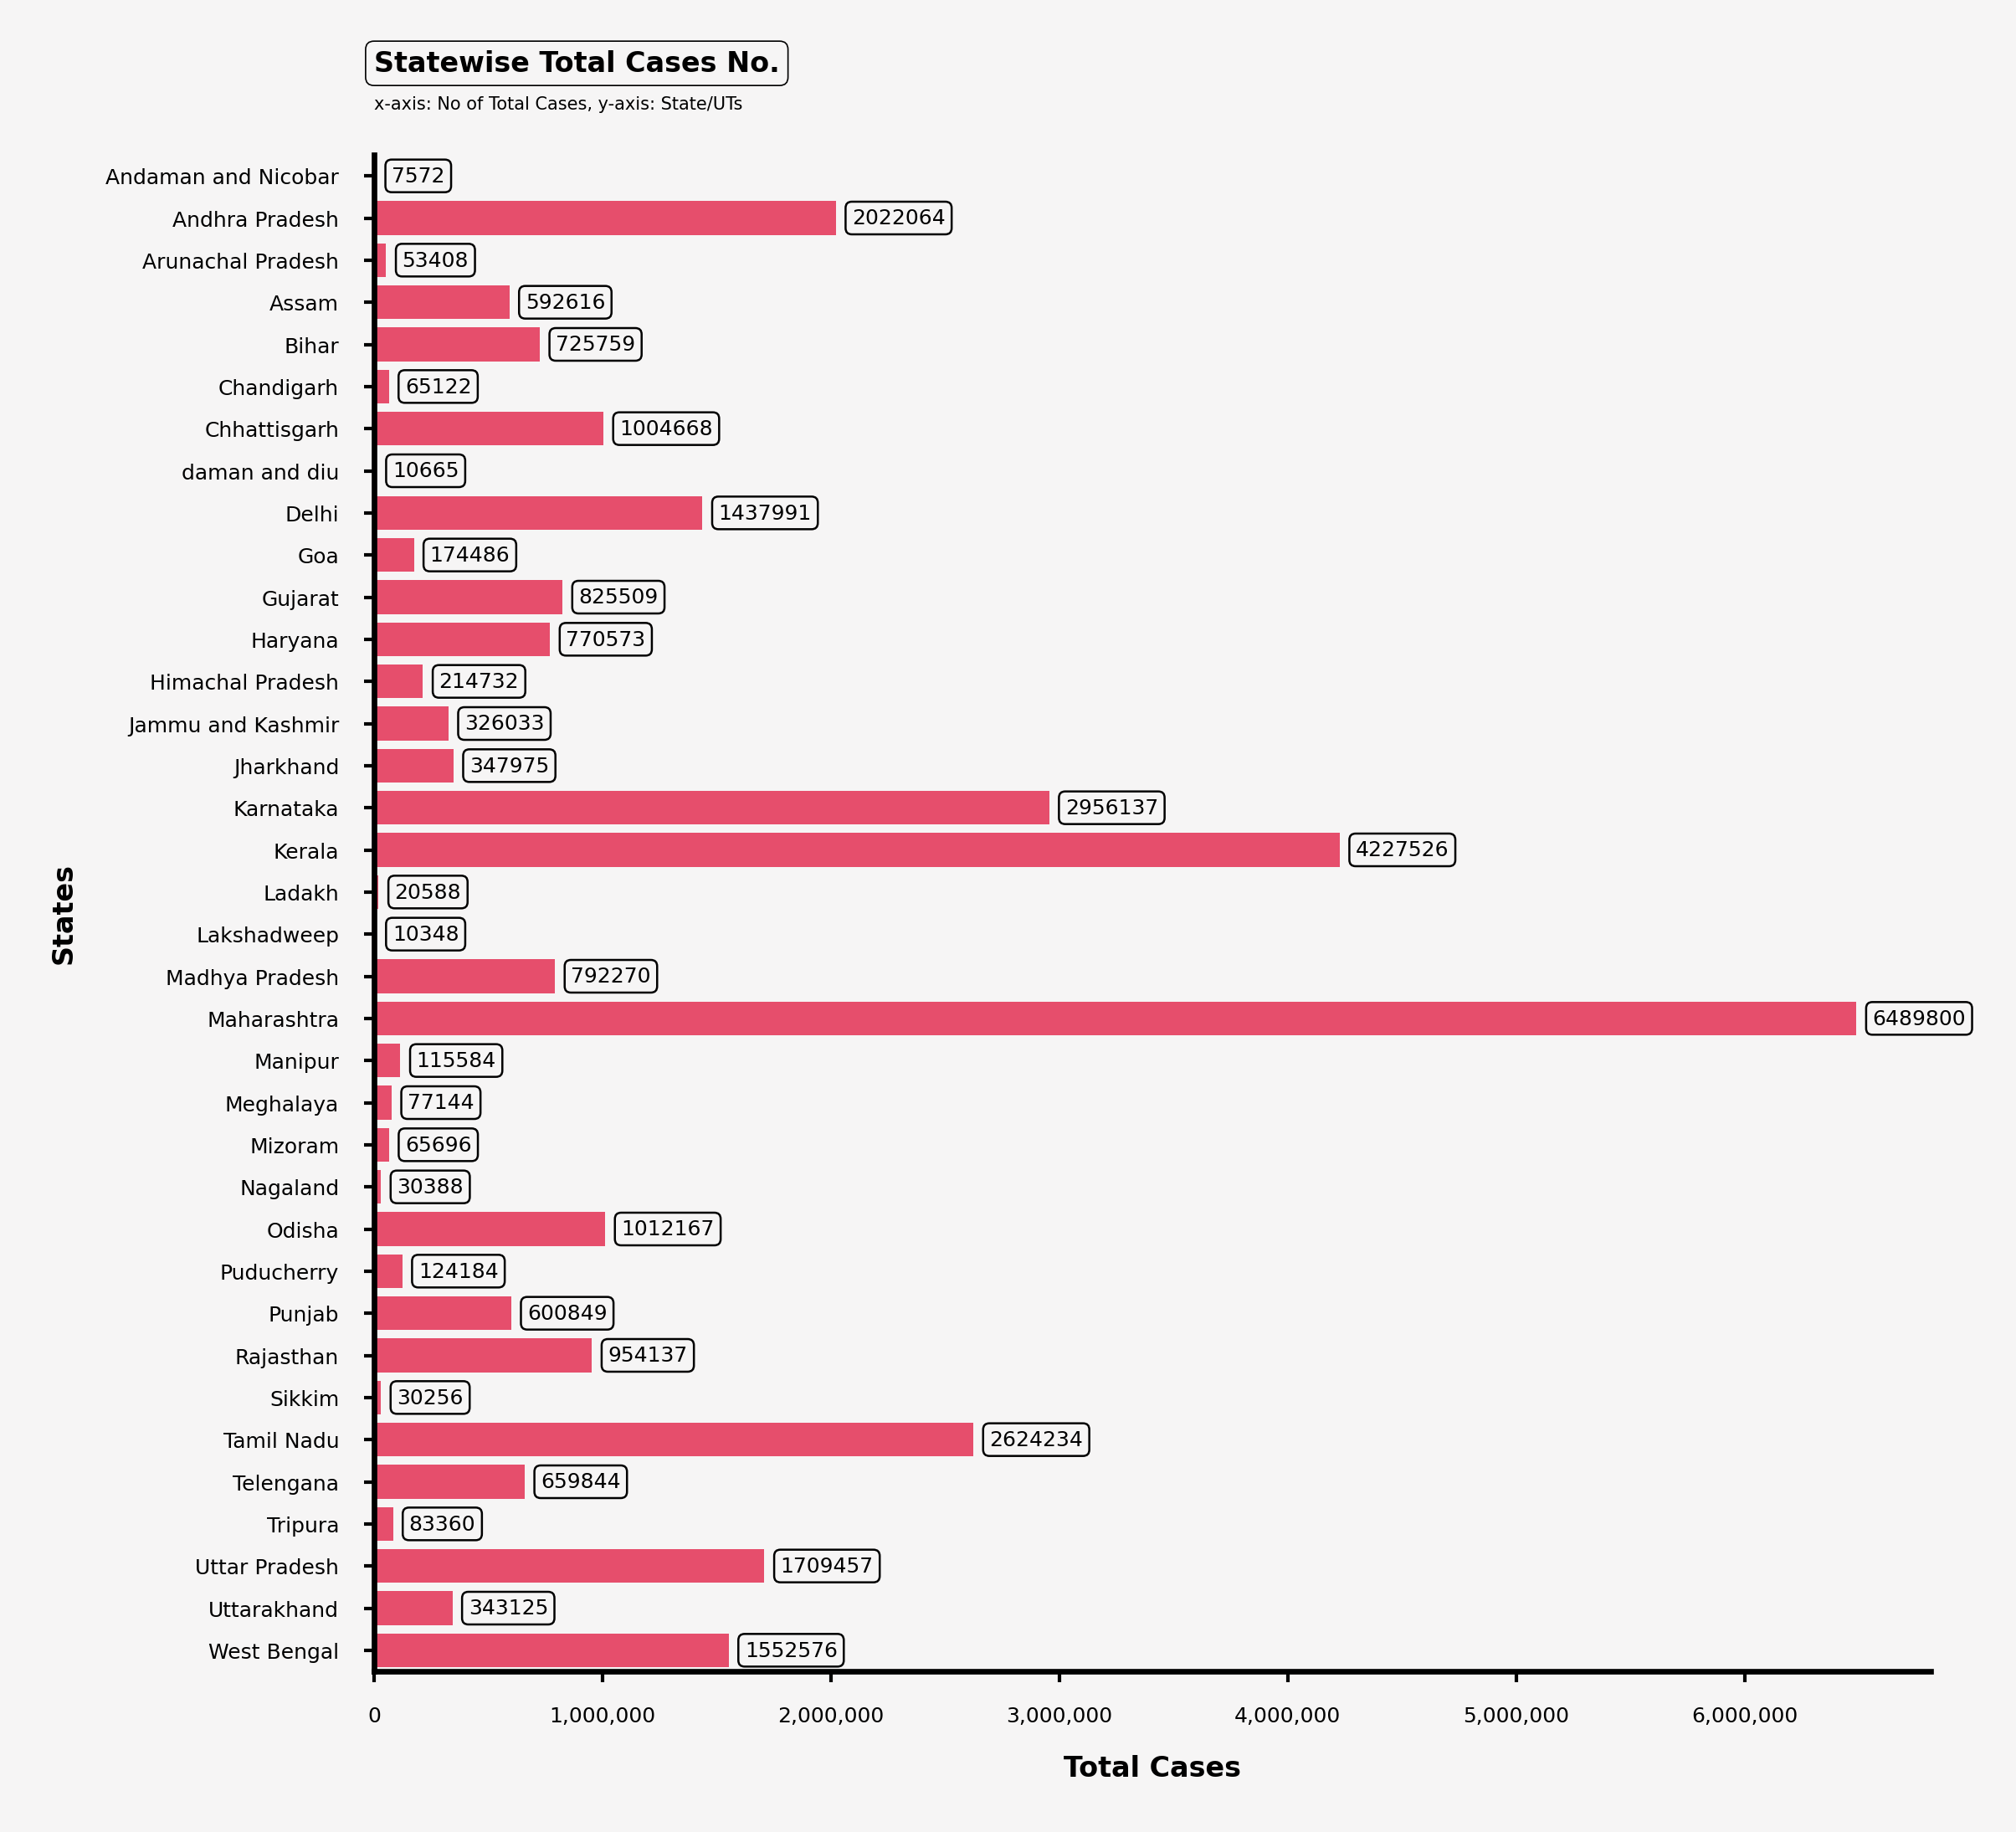

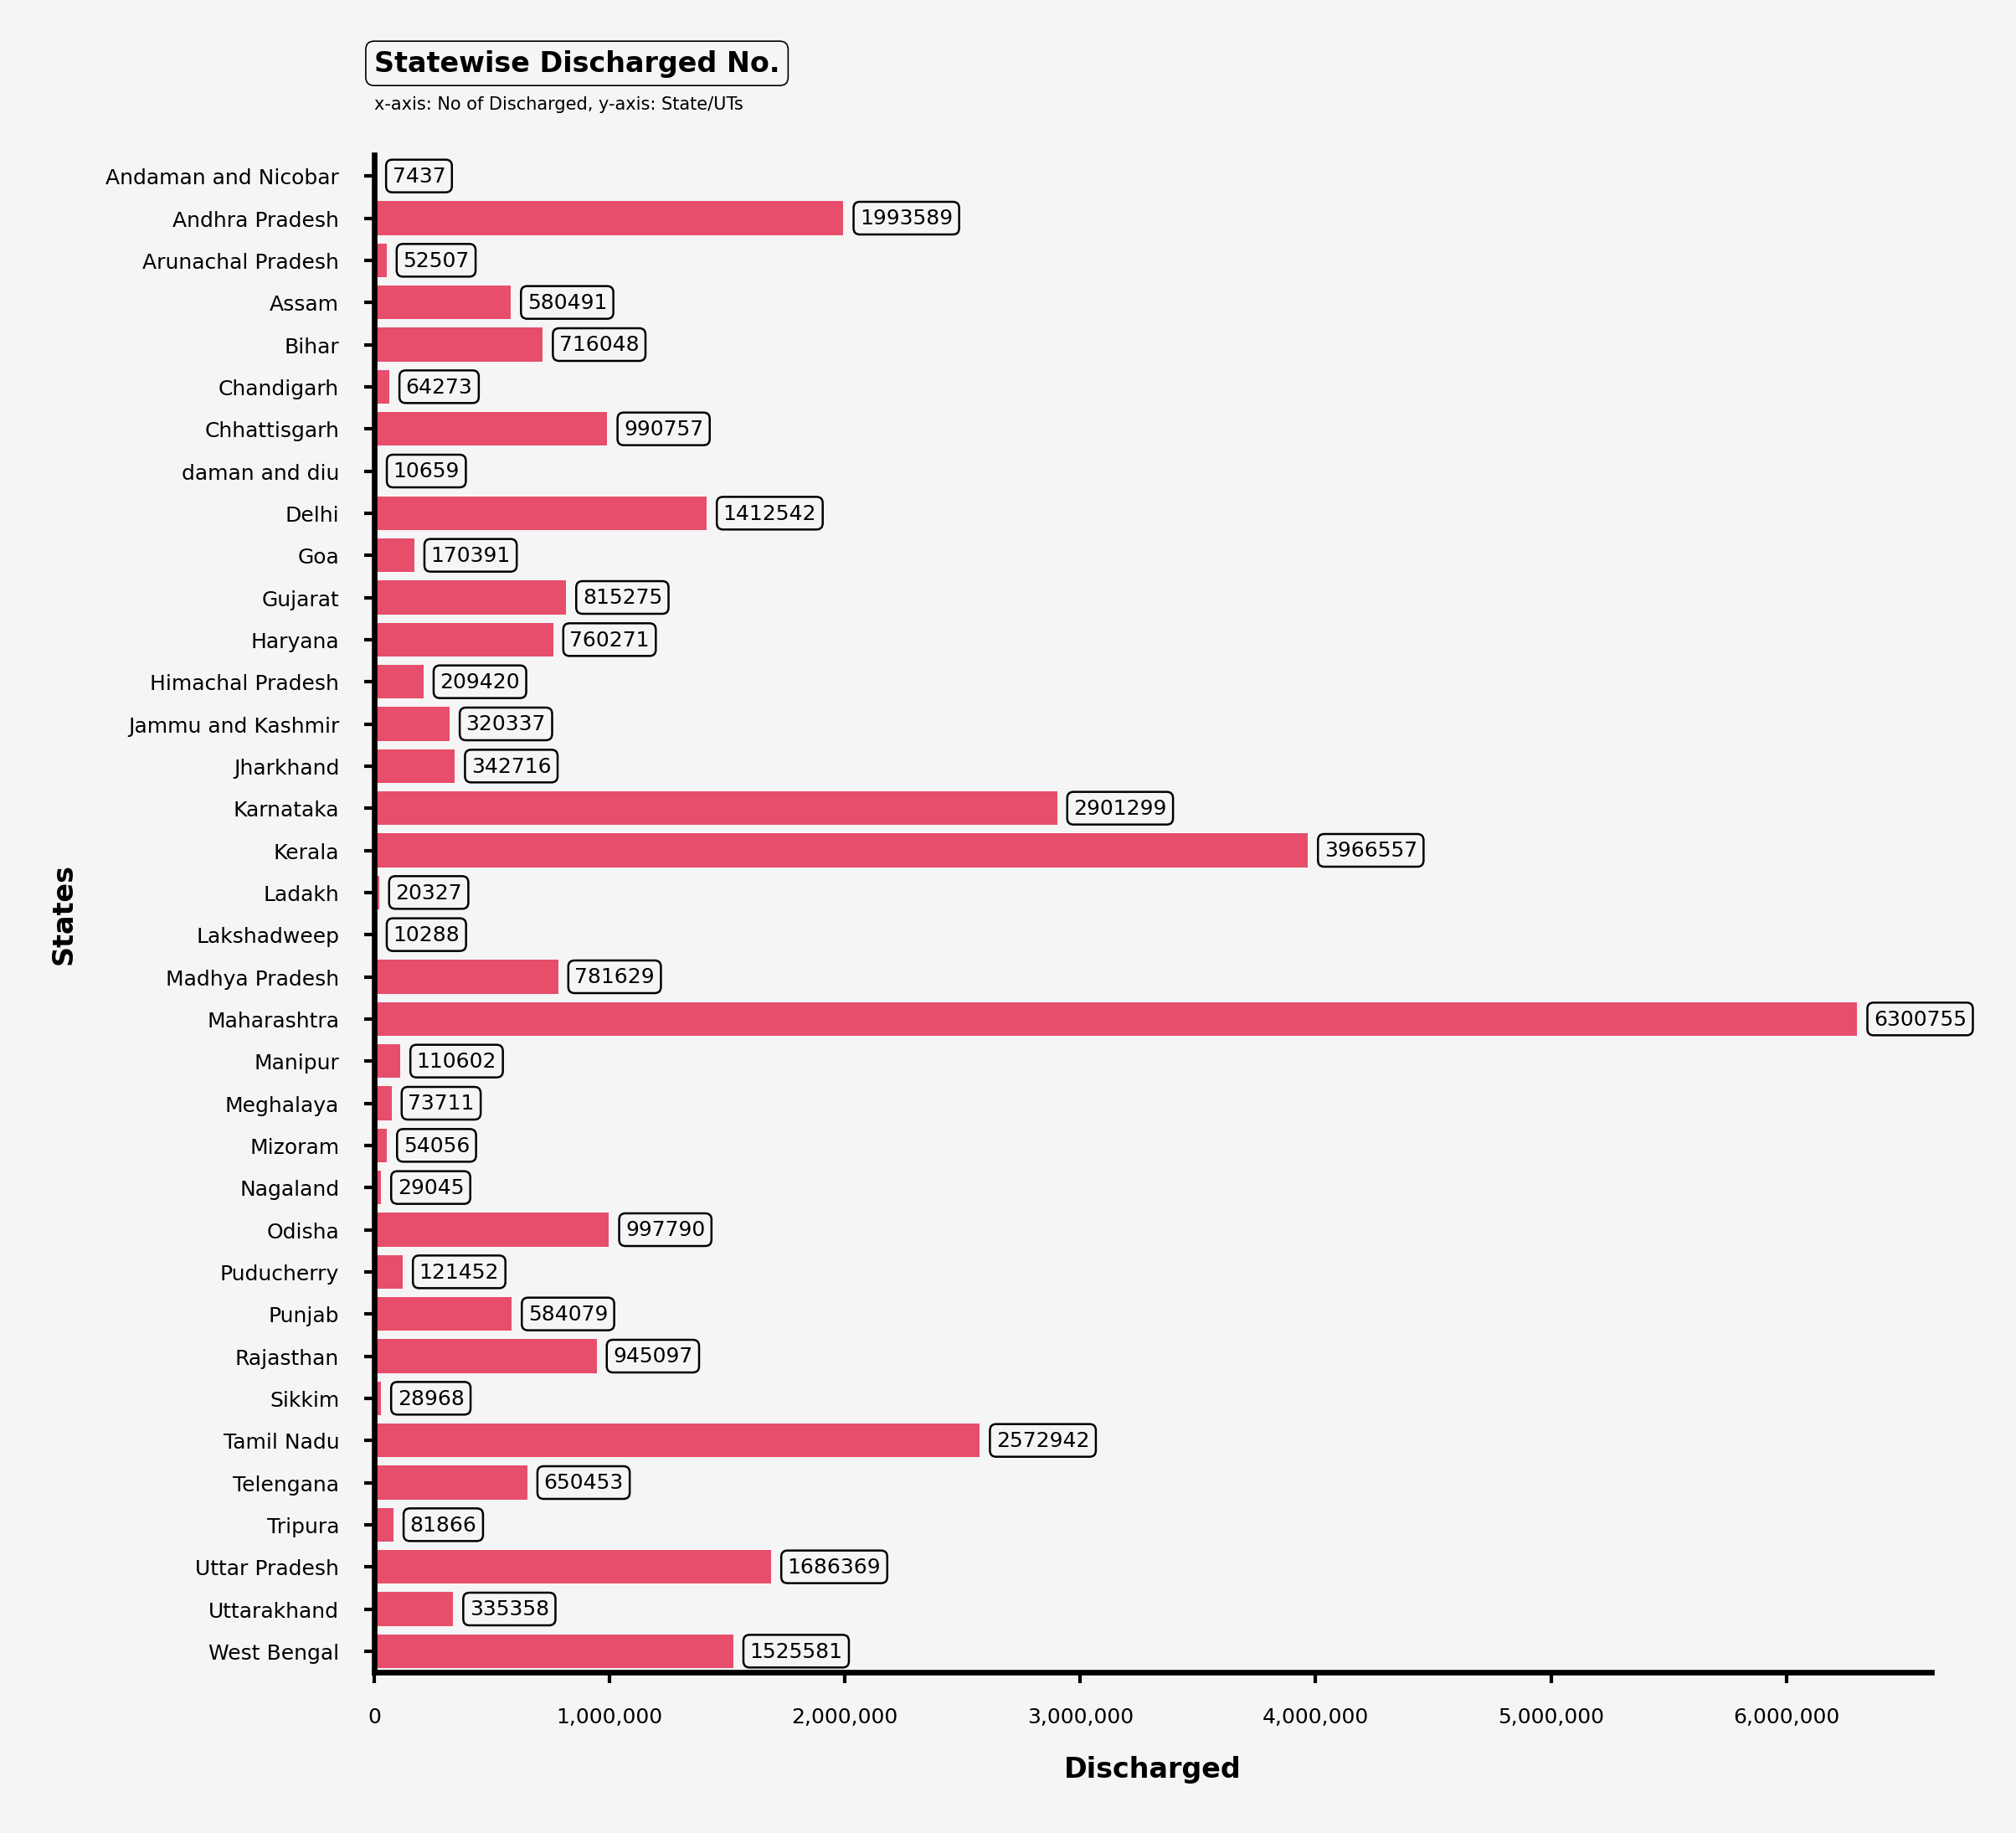

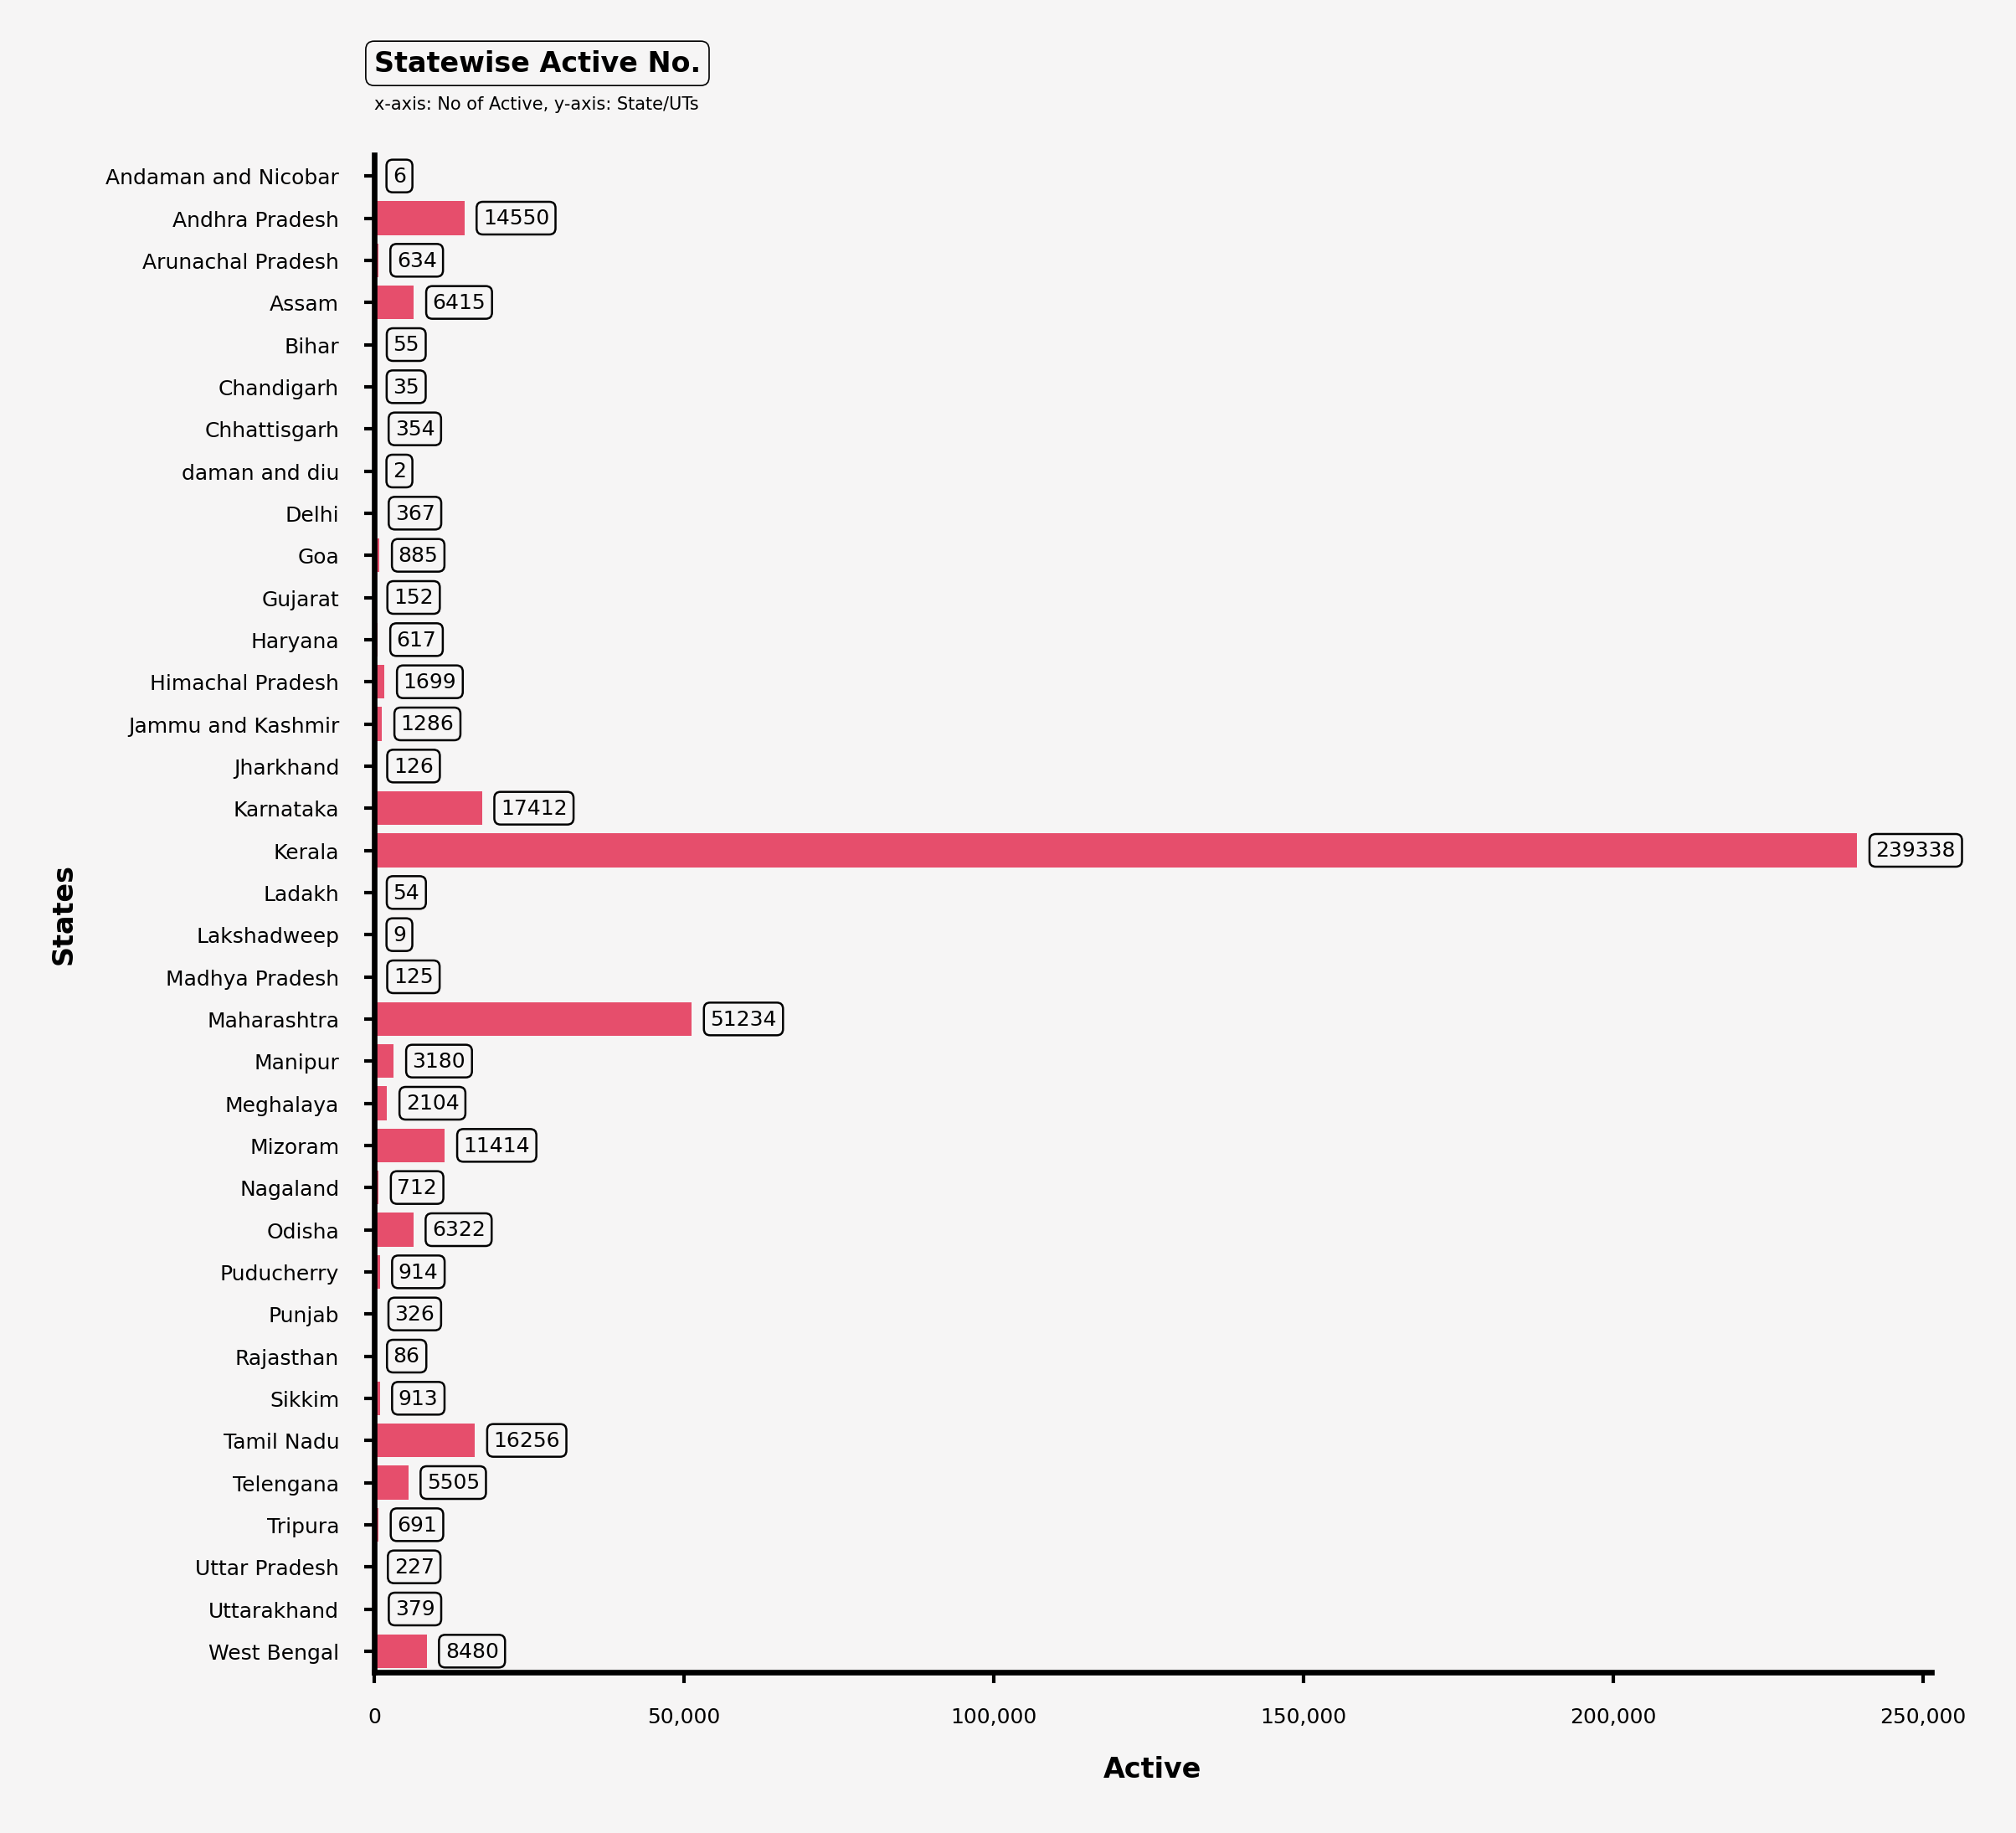

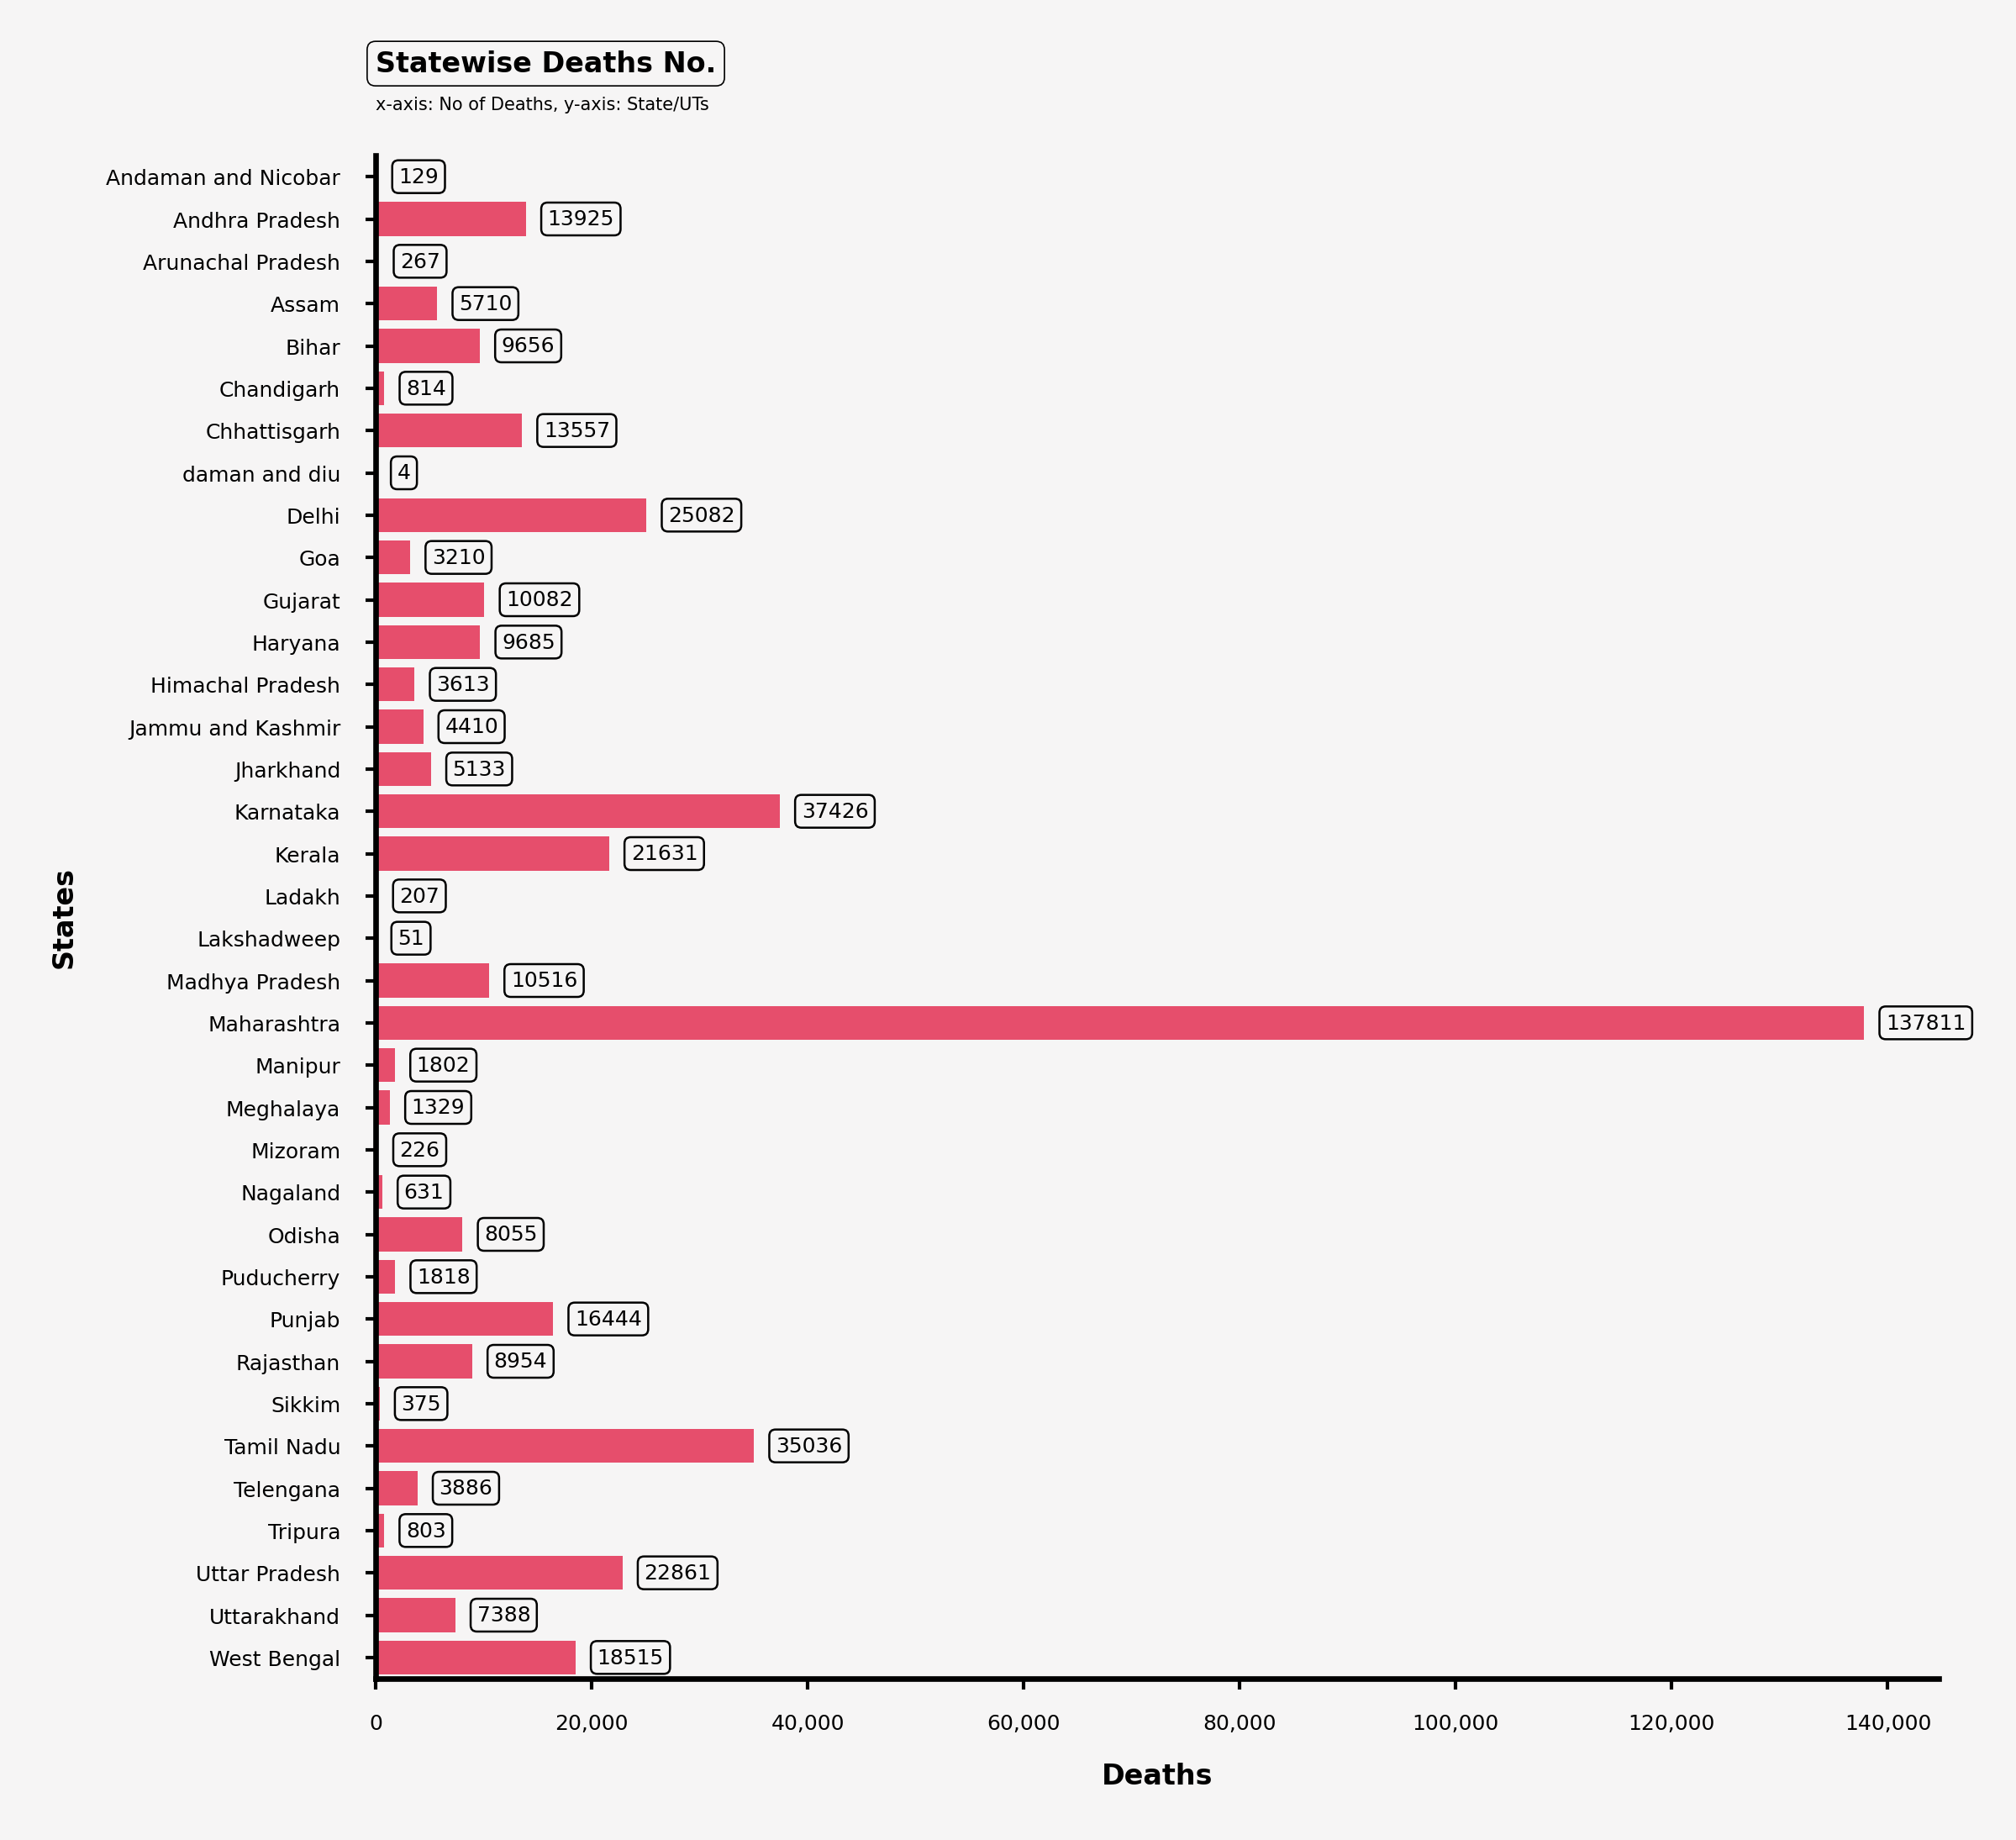

In [13]:
plt.rcParams['figure.dpi'] = 600

part1 = ['Total Cases','Discharged']


for col in part1:
    fig = plt.figure(figsize=(4,4), facecolor='#f6f5f5')
    gs = fig.add_gridspec(1, 1)
    gs.update(wspace=1.5, hspace=0.05)

    background_color = "#f6f5f5"
    sns.set_palette(['#ff355d']*120)
    ax0 = fig.add_subplot(gs[0, 0])

    for s in ["right", "top"]:
        ax0.spines[s].set_visible(False)
    ax0.set_facecolor(background_color)

    ax0.tick_params(labelsize=3, width=0.5, length=1.5)
    ax0_sns = sns.barplot(x=df[col],y=df['State/UTs'],ax=ax0)
    ax0_sns.set_xlabel(col,fontsize=4, weight='bold',)
    ax0_sns.set_ylabel("States",fontsize=4, weight='bold')

    ax0.text(0, -3, f'Statewise {col} No.', fontsize=4, ha='left', va='top', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
    ax0.text(0, -1.90, f'x-axis: No of {col}, y-axis: State/UTs', fontsize=2.5, ha='left', va='top')
    ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    for p in ax0.patches:
        value = f'{p.get_width():.0f}'
        x = p.get_x() + p.get_width() + 70000
        y = p.get_y() + p.get_height() / 2 
        ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

part2 = ['Active','Deaths']    

for col in part2:
    if col != 'Deaths':
        fig = plt.figure(figsize=(4,4), facecolor='#f6f5f5')
        gs = fig.add_gridspec(1, 1)
        gs.update(wspace=1.5, hspace=0.05)

        background_color = "#f6f5f5"
        sns.set_palette(['#ff355d']*120)
        ax0 = fig.add_subplot(gs[0, 0])

        for s in ["right", "top"]:
            ax0.spines[s].set_visible(False)
        ax0.set_facecolor(background_color)

        ax0.tick_params(labelsize=3, width=0.5, length=1.5)
        ax0_sns = sns.barplot(x=df[col],y=df['State/UTs'],ax=ax0)
        ax0_sns.set_xlabel(col,fontsize=4, weight='bold',)
        ax0_sns.set_ylabel("States",fontsize=4, weight='bold')

        ax0.text(0, -3, f'Statewise {col} No.', fontsize=4, ha='left', va='top', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
        ax0.text(0, -1.90, f'x-axis: No of {col}, y-axis: State/UTs', fontsize=2.5, ha='left', va='top')
        ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        for p in ax0.patches:
            value = f'{p.get_width():.0f}'
            x = p.get_x() + p.get_width() + 3000
            y = p.get_y() + p.get_height() / 2 
            ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))
    else:
        fig = plt.figure(figsize=(4,4), facecolor='#f6f5f5')
        gs = fig.add_gridspec(1, 1)
        gs.update(wspace=1.5, hspace=0.05)

        background_color = "#f6f5f5"
        sns.set_palette(['#ff355d']*120)
        ax0 = fig.add_subplot(gs[0, 0])

        for s in ["right", "top"]:
            ax0.spines[s].set_visible(False)
        ax0.set_facecolor(background_color)

        ax0.tick_params(labelsize=3, width=0.5, length=1.5)
        ax0_sns = sns.barplot(x=df[col],y=df['State/UTs'],ax=ax0)
        ax0_sns.set_xlabel(col,fontsize=4, weight='bold',)
        ax0_sns.set_ylabel("States",fontsize=4, weight='bold')

        ax0.text(0, -3, f'Statewise {col} No.', fontsize=4, ha='left', va='top', weight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.2))
        ax0.text(0, -1.90, f'x-axis: No of {col}, y-axis: State/UTs', fontsize=2.5, ha='left', va='top')
        ax0.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
        for p in ax0.patches:
            value = f'{p.get_width():.0f}'
            x = p.get_x() + p.get_width() + 2000
            y = p.get_y() + p.get_height() / 2 
            ax0.text(x, y, value, ha='left', va='center', fontsize=3, 
                    bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

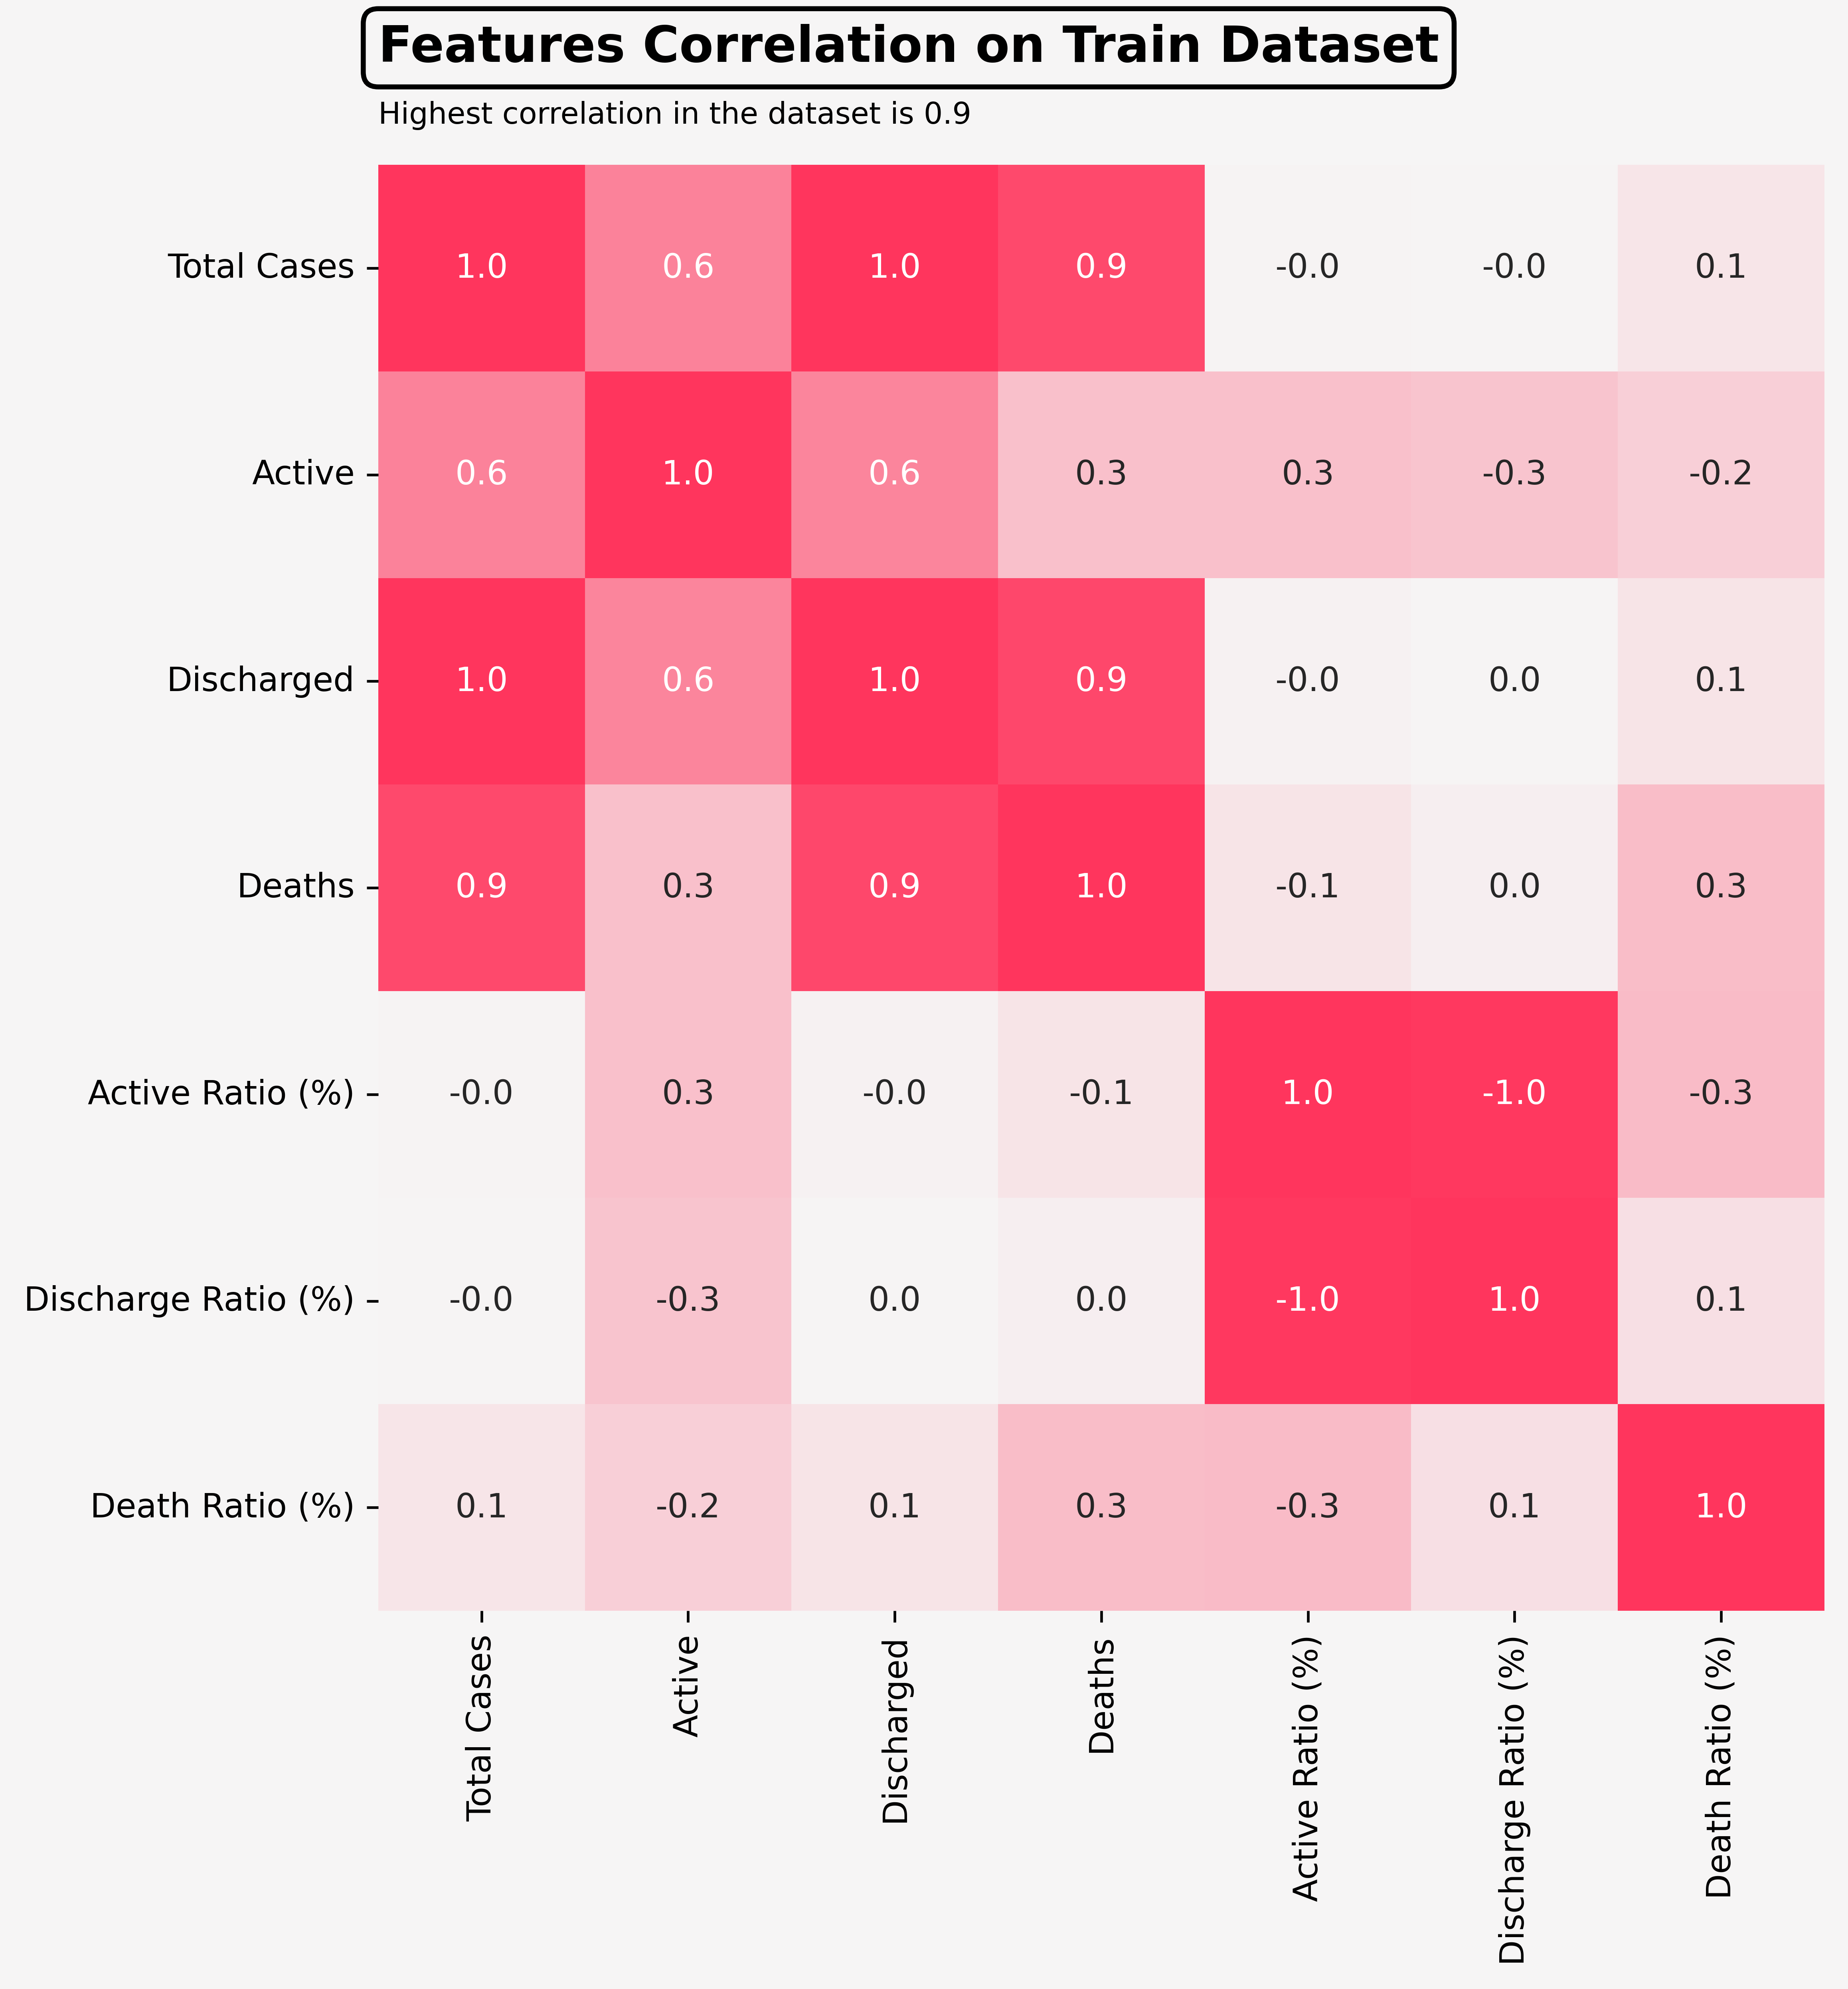

In [14]:
background_color = "#f6f5f5"

fig = plt.figure(figsize=(18, 8), facecolor=background_color)
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])

colors = ["#ff355d", "#f6f5f5","#ff355d"]
colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

ax0.set_facecolor(background_color)
ax0.text(0, -0.5, 'Features Correlation on Train Dataset', fontsize=15, fontweight='bold',bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=1.5))
ax0.text(0, -0.2, 'Highest correlation in the dataset is 0.9', fontsize=9, fontweight='light')

sns.heatmap(df.corr(), ax=ax0, vmin=-1, vmax=1, annot=True, square=True, 
            cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap, fmt='.1f')
plt.show()

In [24]:
from sklearn.linear_model import HuberRegressor

y_train = df.Deaths
df.drop(['Deaths'],axis=1,inplace=True)

huberreg = HuberRegressor(alpha=0.001, epsilon=1.7, fit_intercept=True, max_iter=100,
               tol=1e-05, warm_start=False)

huberreg.fit(df,y_train)
Deaths_pred = huberreg.predict(leave_it_out)

print('Prediction of One Holdout row: ',f'\n\nPredicted Deaths: {int(Deaths_pred[0])}\nReal Nos.of Deaths Happend: {Deaths.values[0]}')

Prediction of One Holdout row:  

Predicted Deaths: 128
Real Nos.of Deaths Happend: 129
